# Abalone Practice Priject

In [1]:
#Importing All Libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import r2_score ,mean_absolute_error,mean_squared_error
#from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.shape

(4177, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


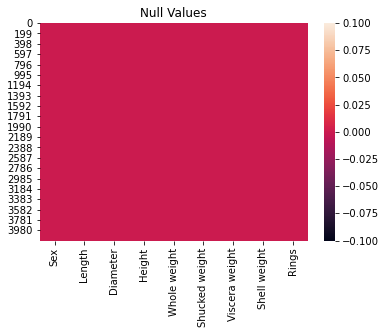

In [8]:
#plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [9]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

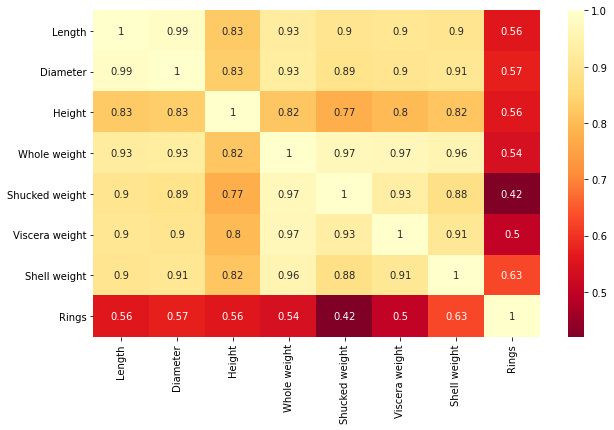

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

In [13]:
corr_matrix = df.corr()
corr_matrix["Rings"].sort_values(ascending=True)

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

# Plotting Outliers

In [14]:
collist=df.columns.values
collist

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype=object)

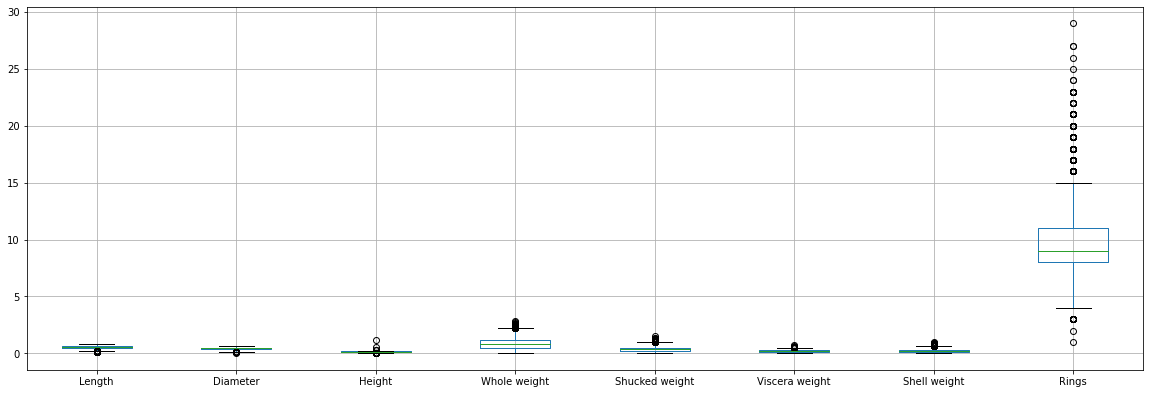

In [15]:
#plotting box plot for the required number of ( 12 )columns
df.iloc[:,0:10].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Univariate analysis

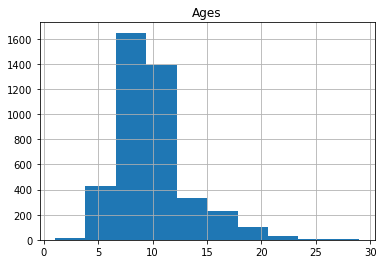

In [16]:
df["Rings"].hist(grid=True)
plt.title("Ages")
plt.show()

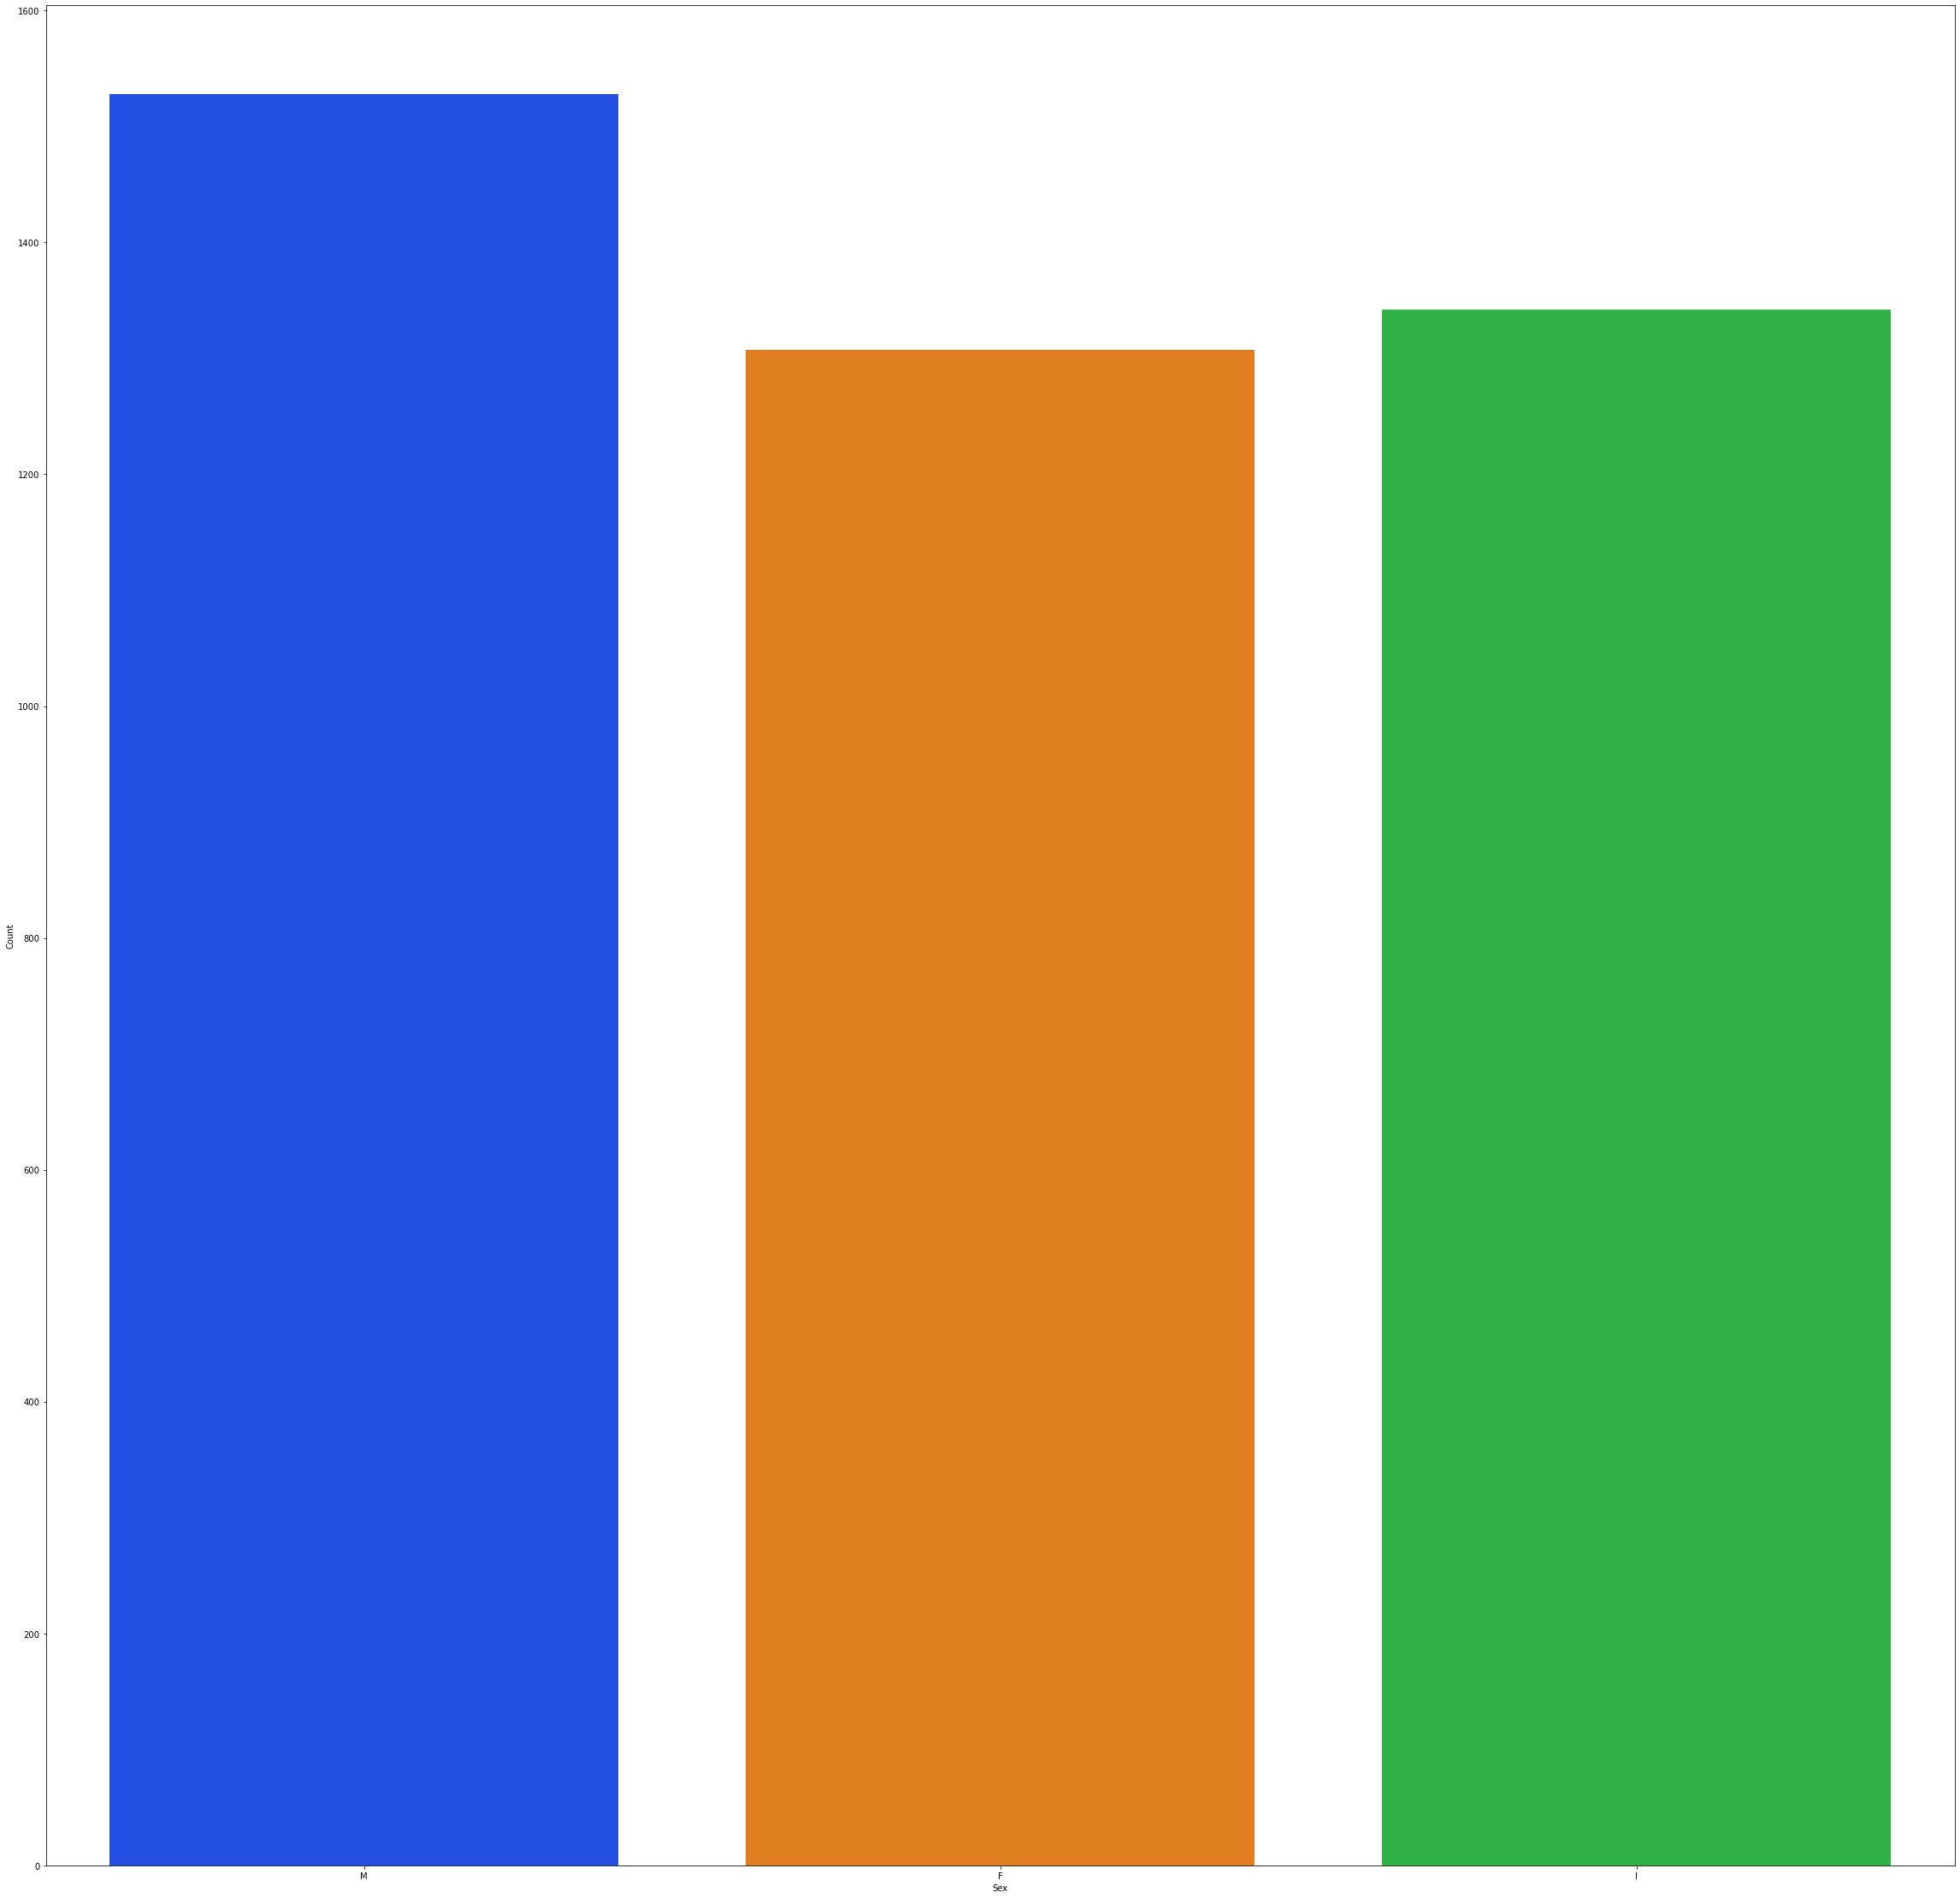

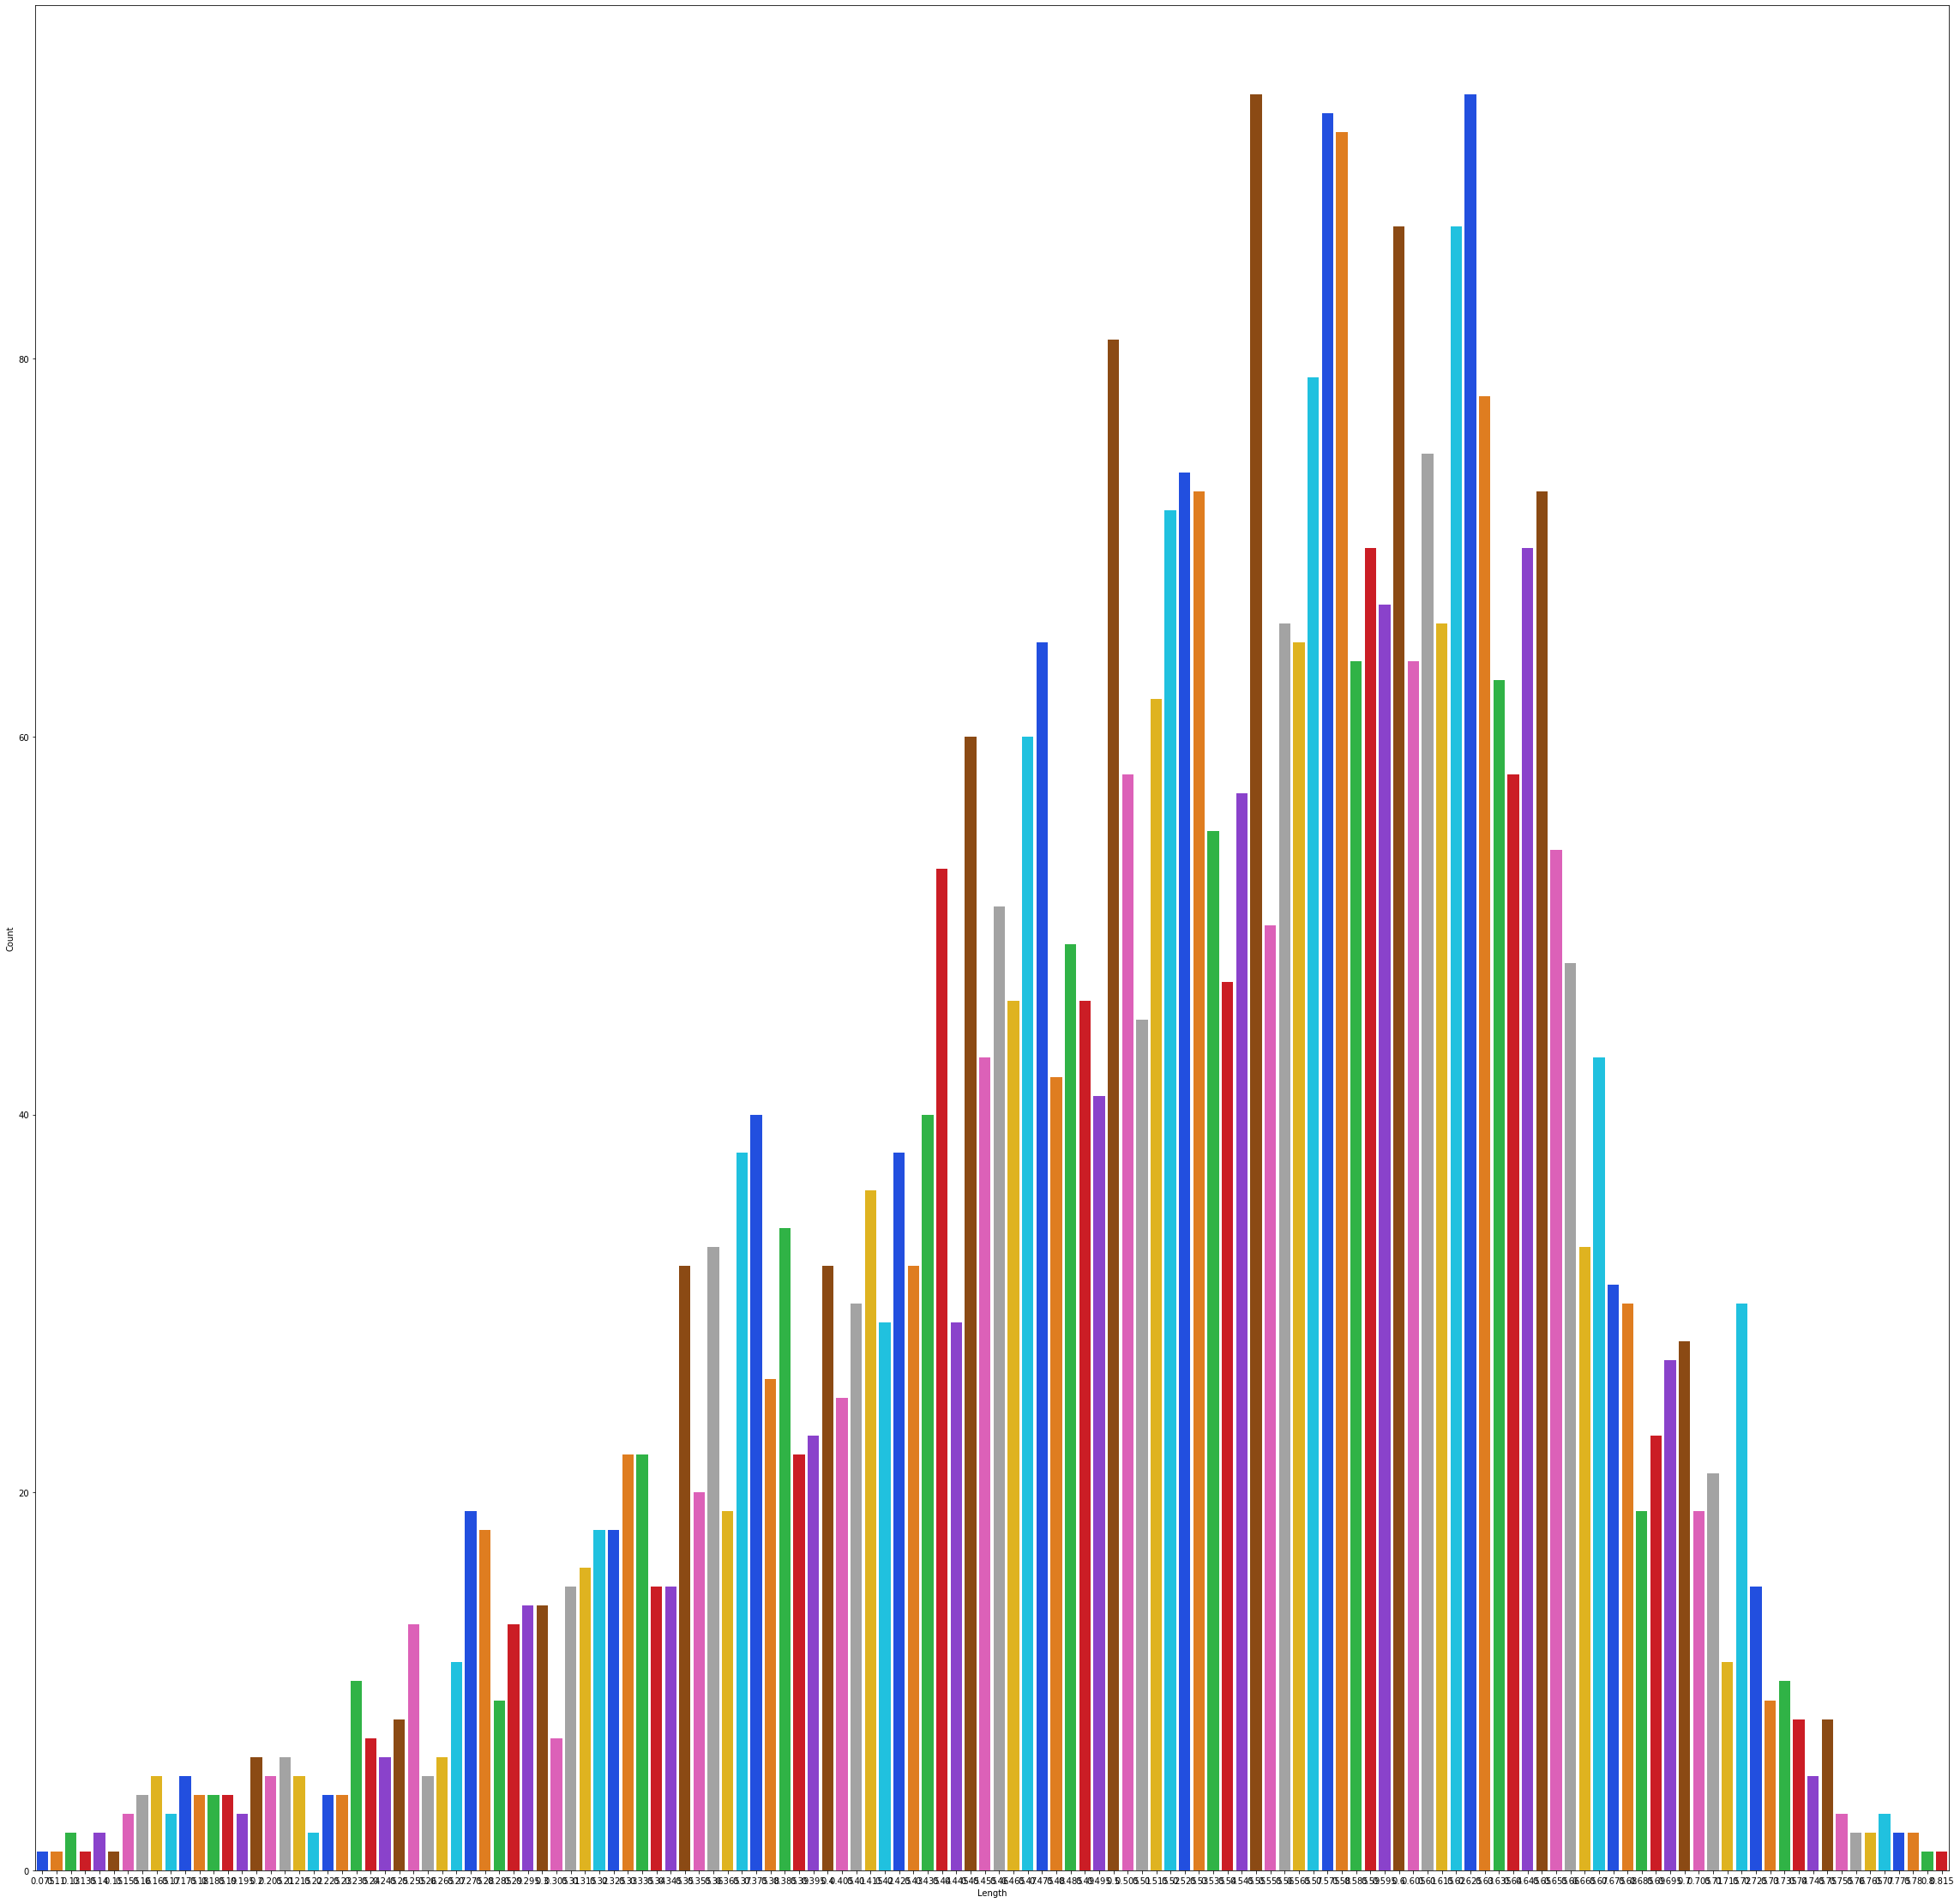

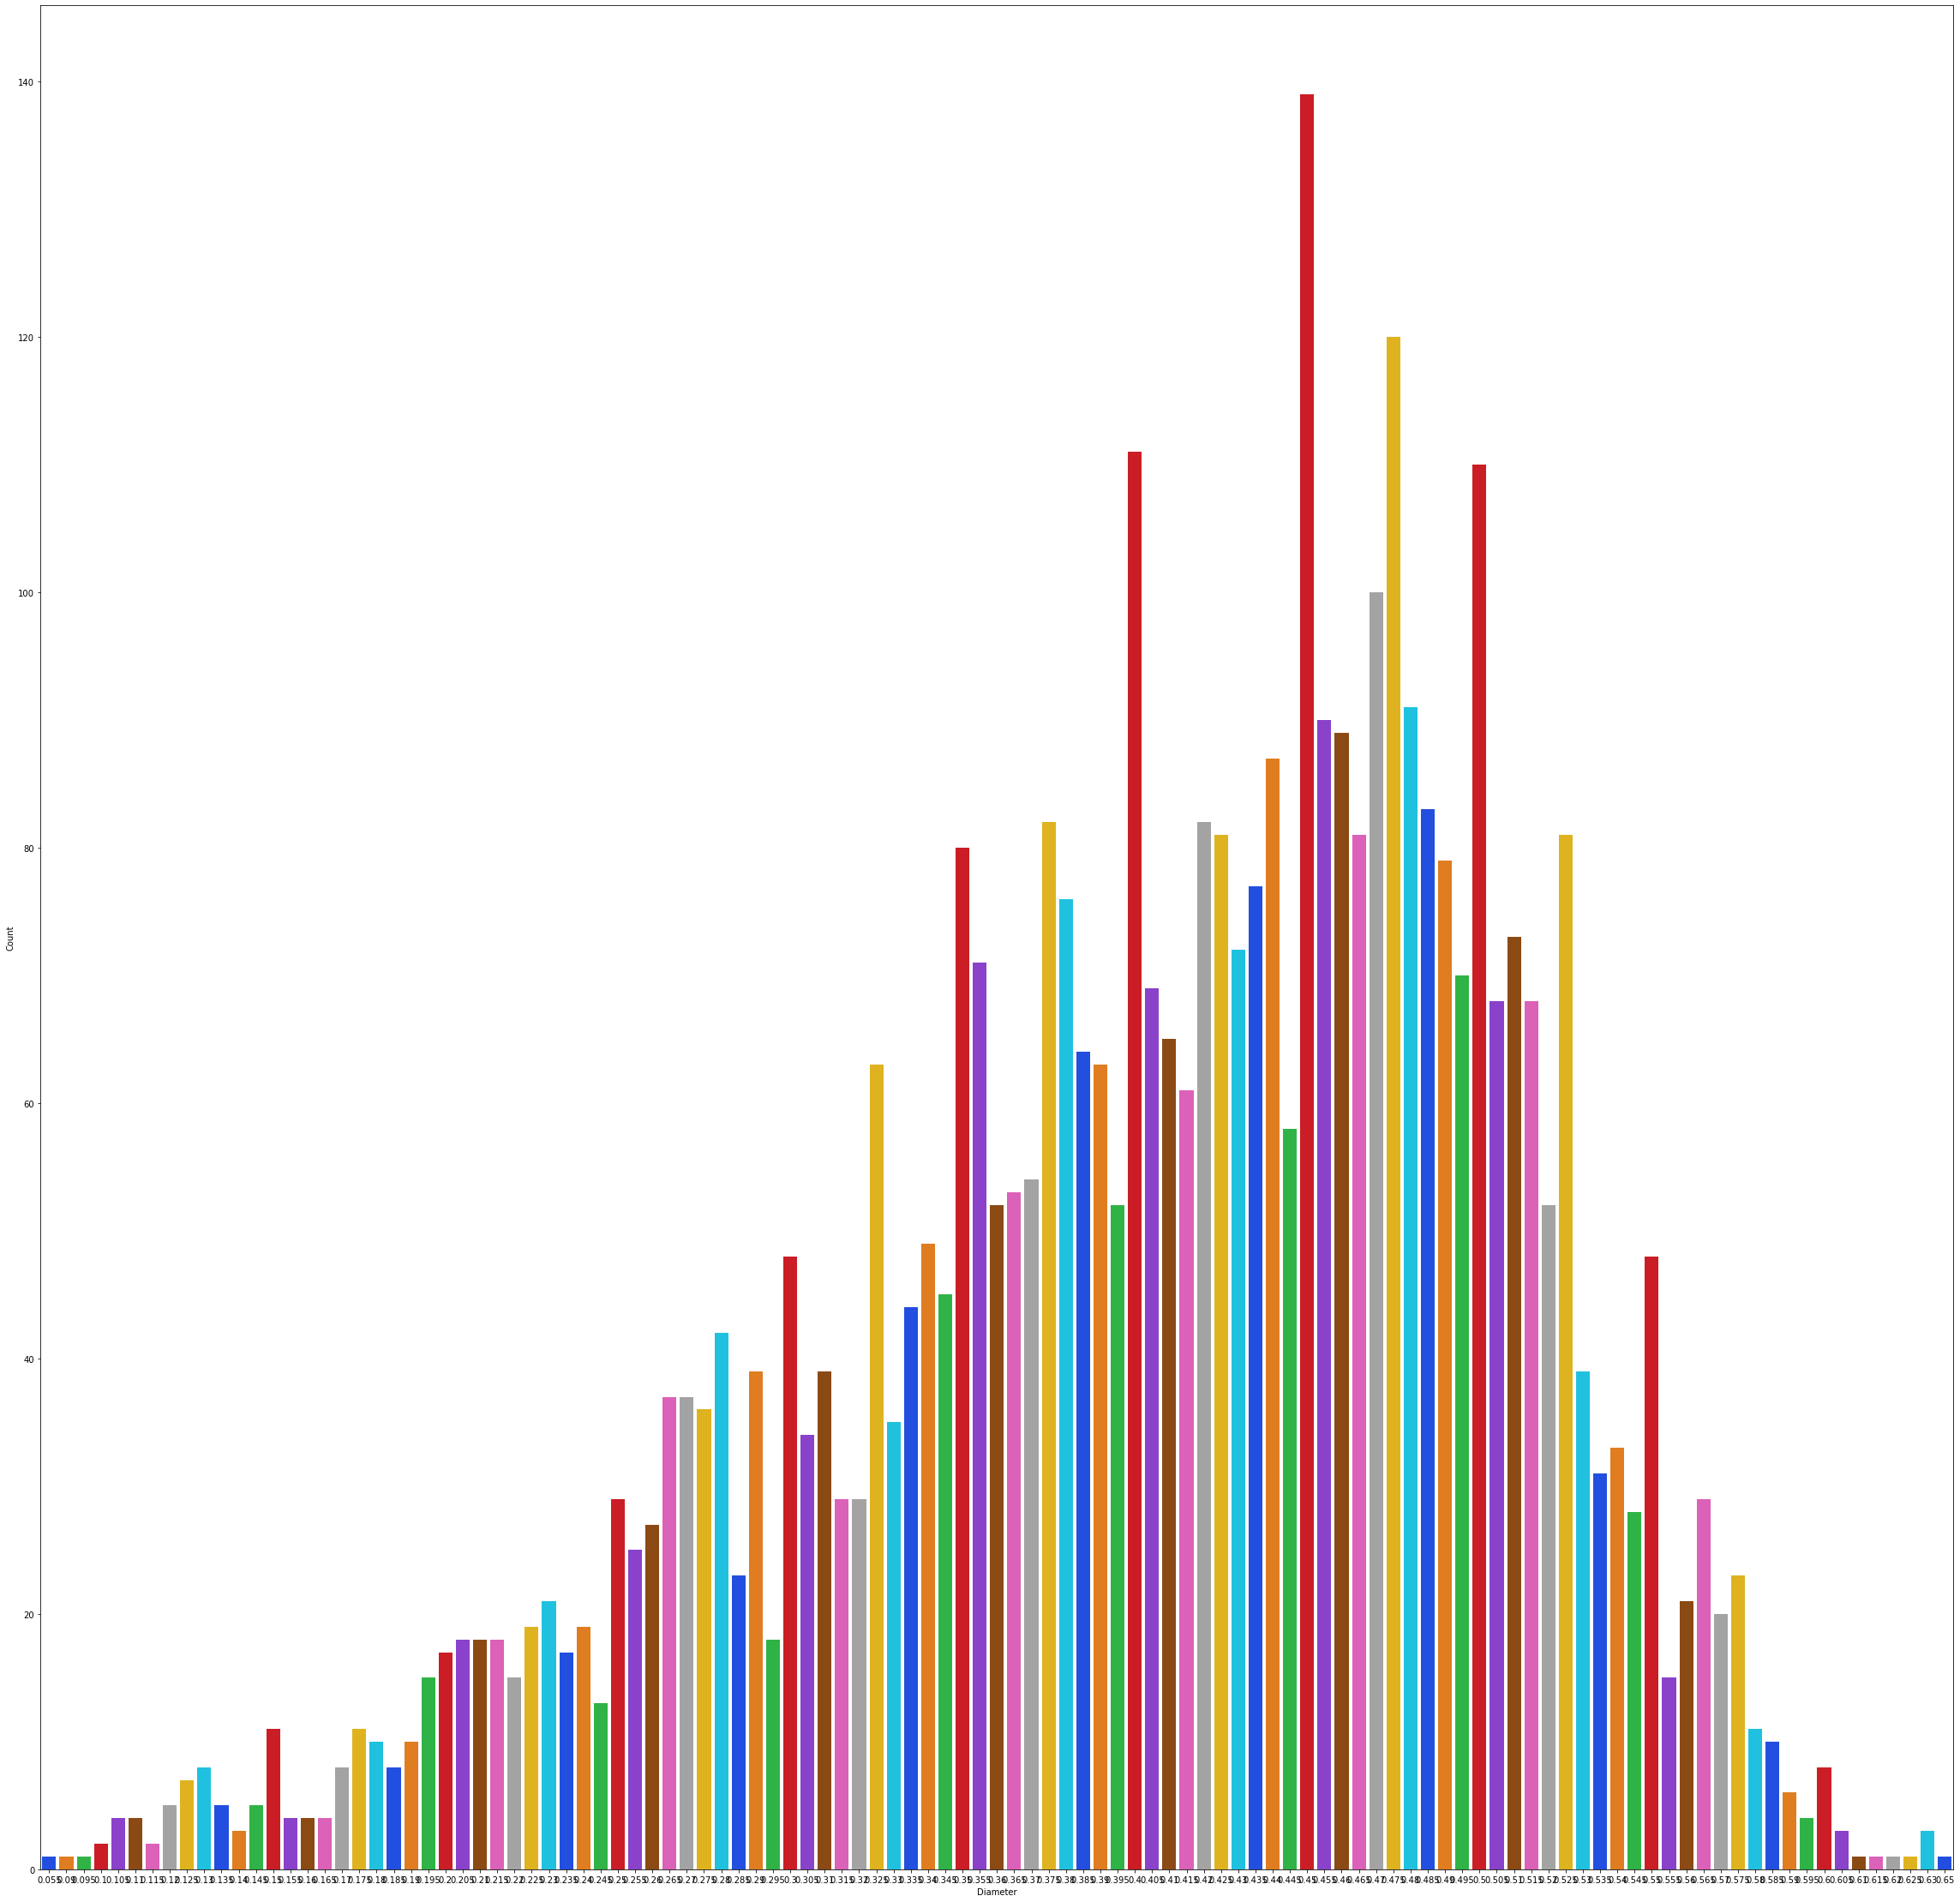

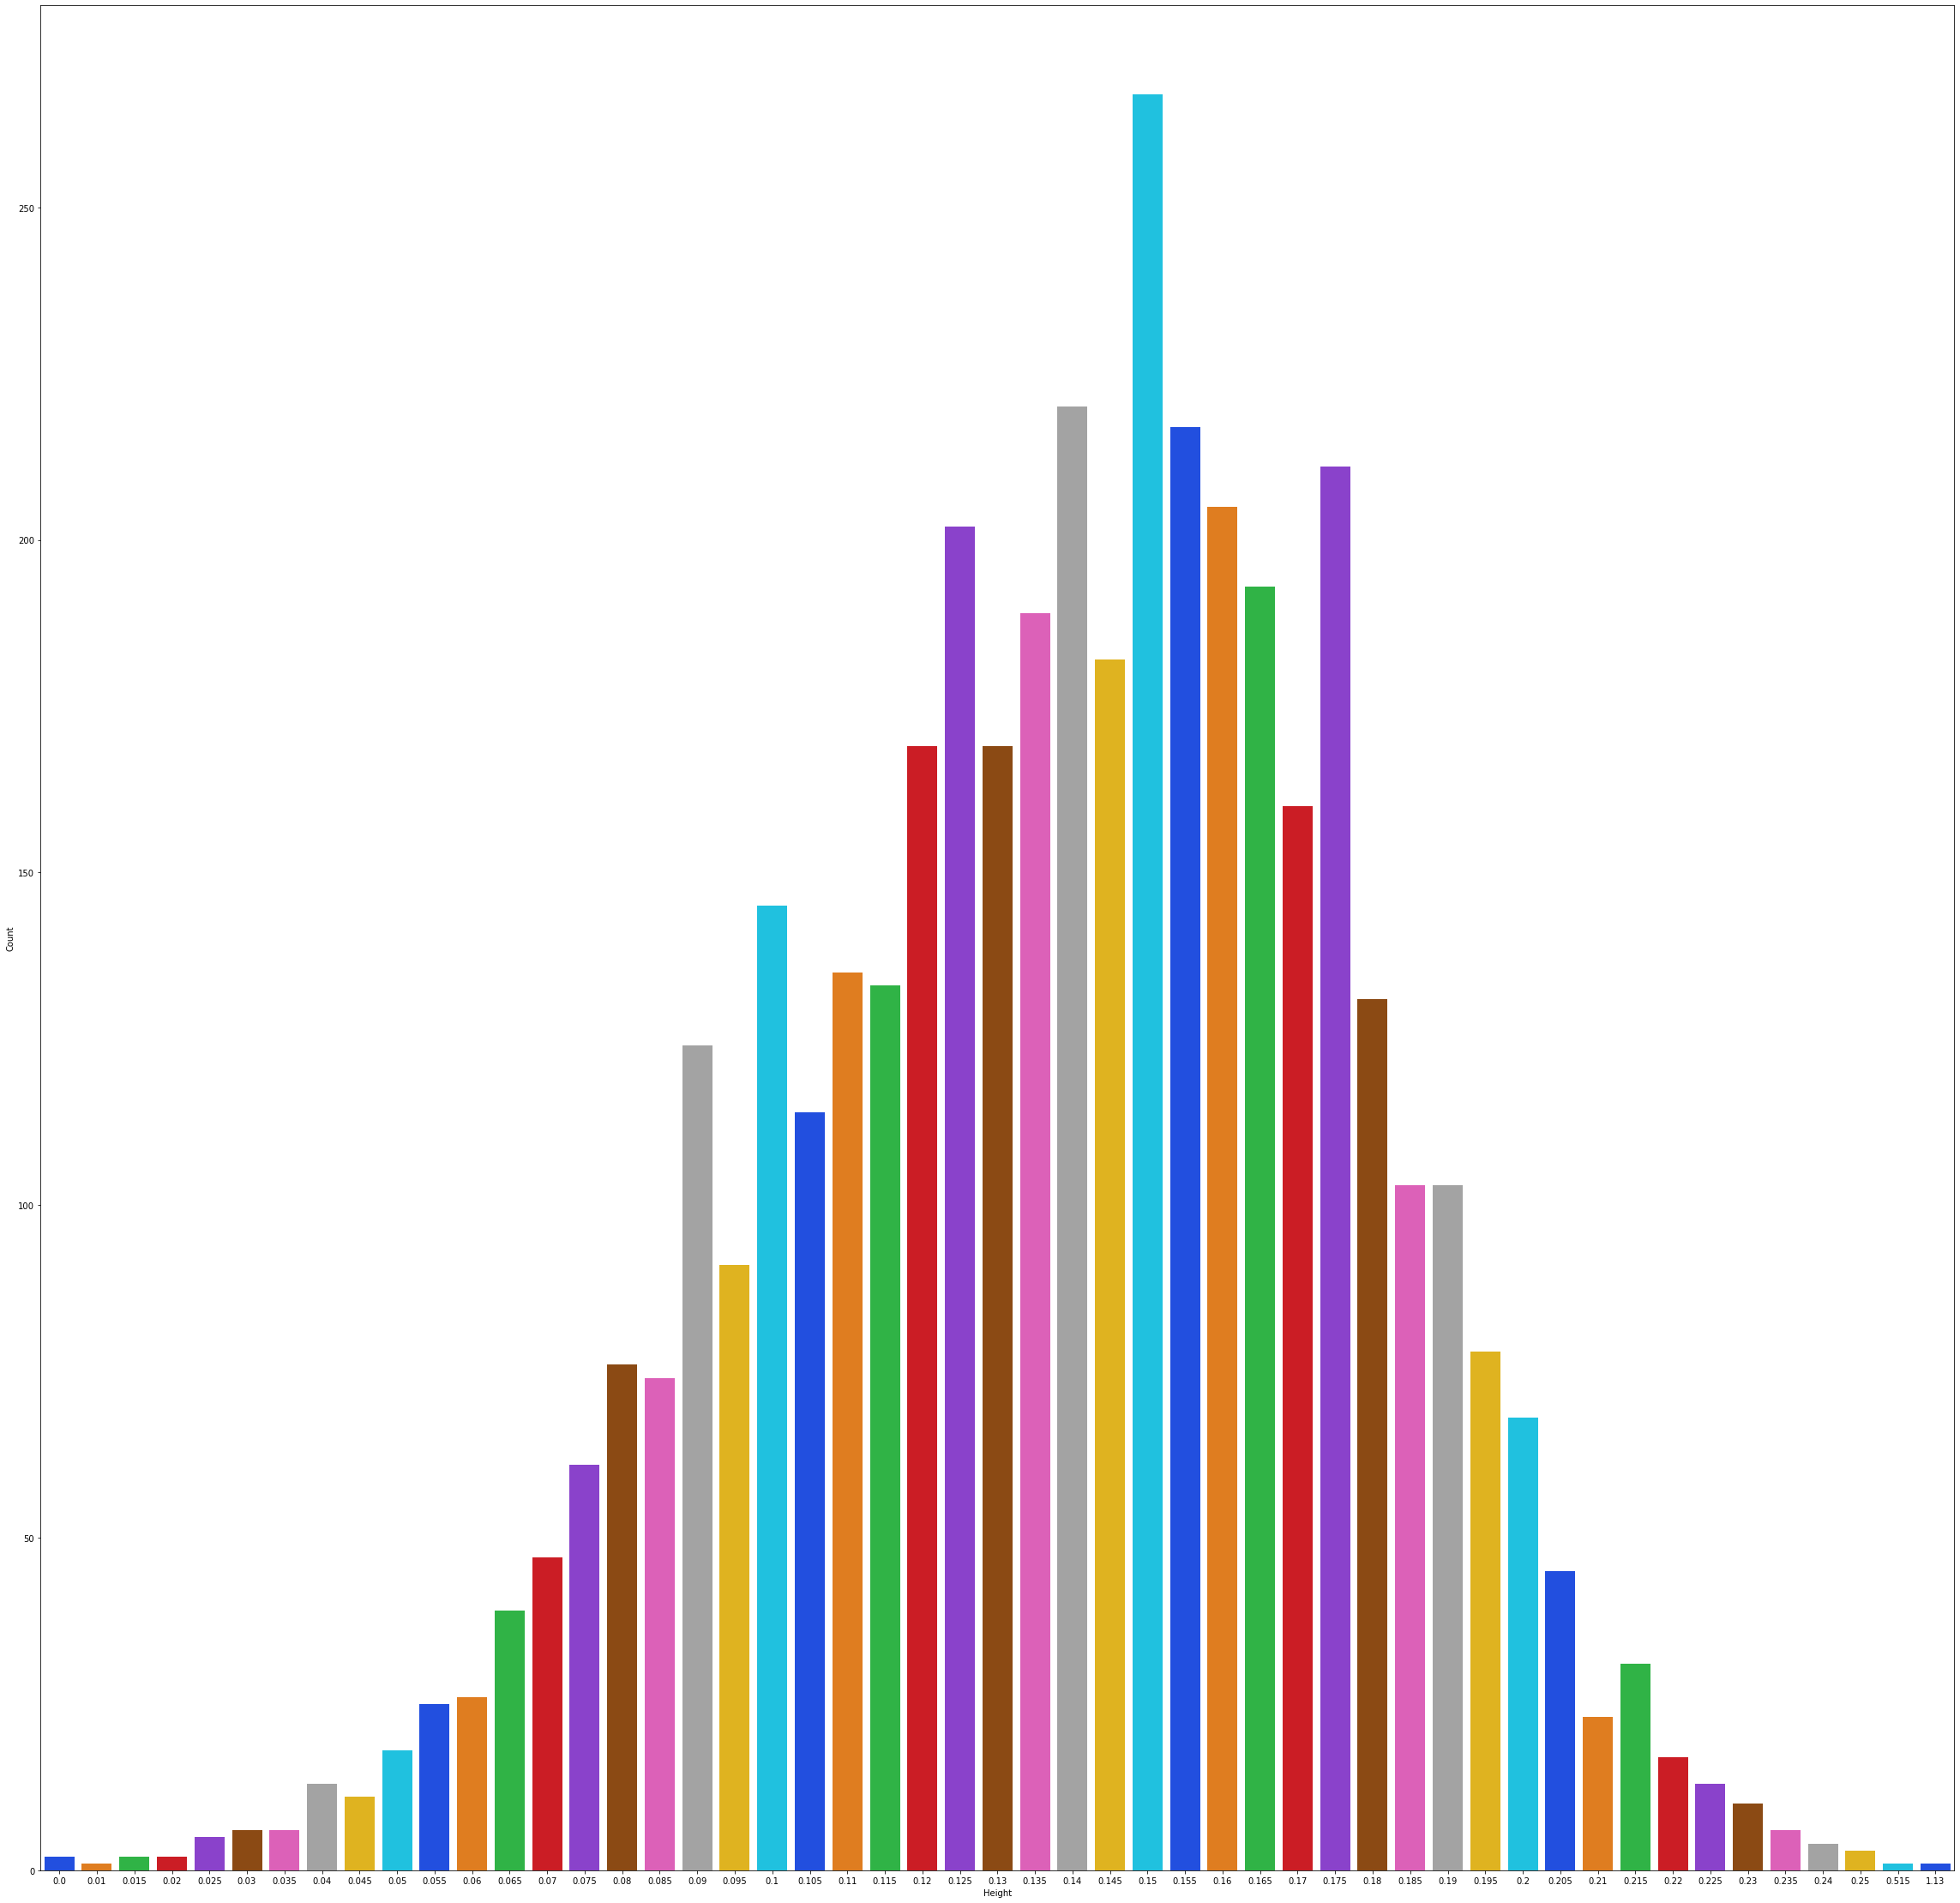

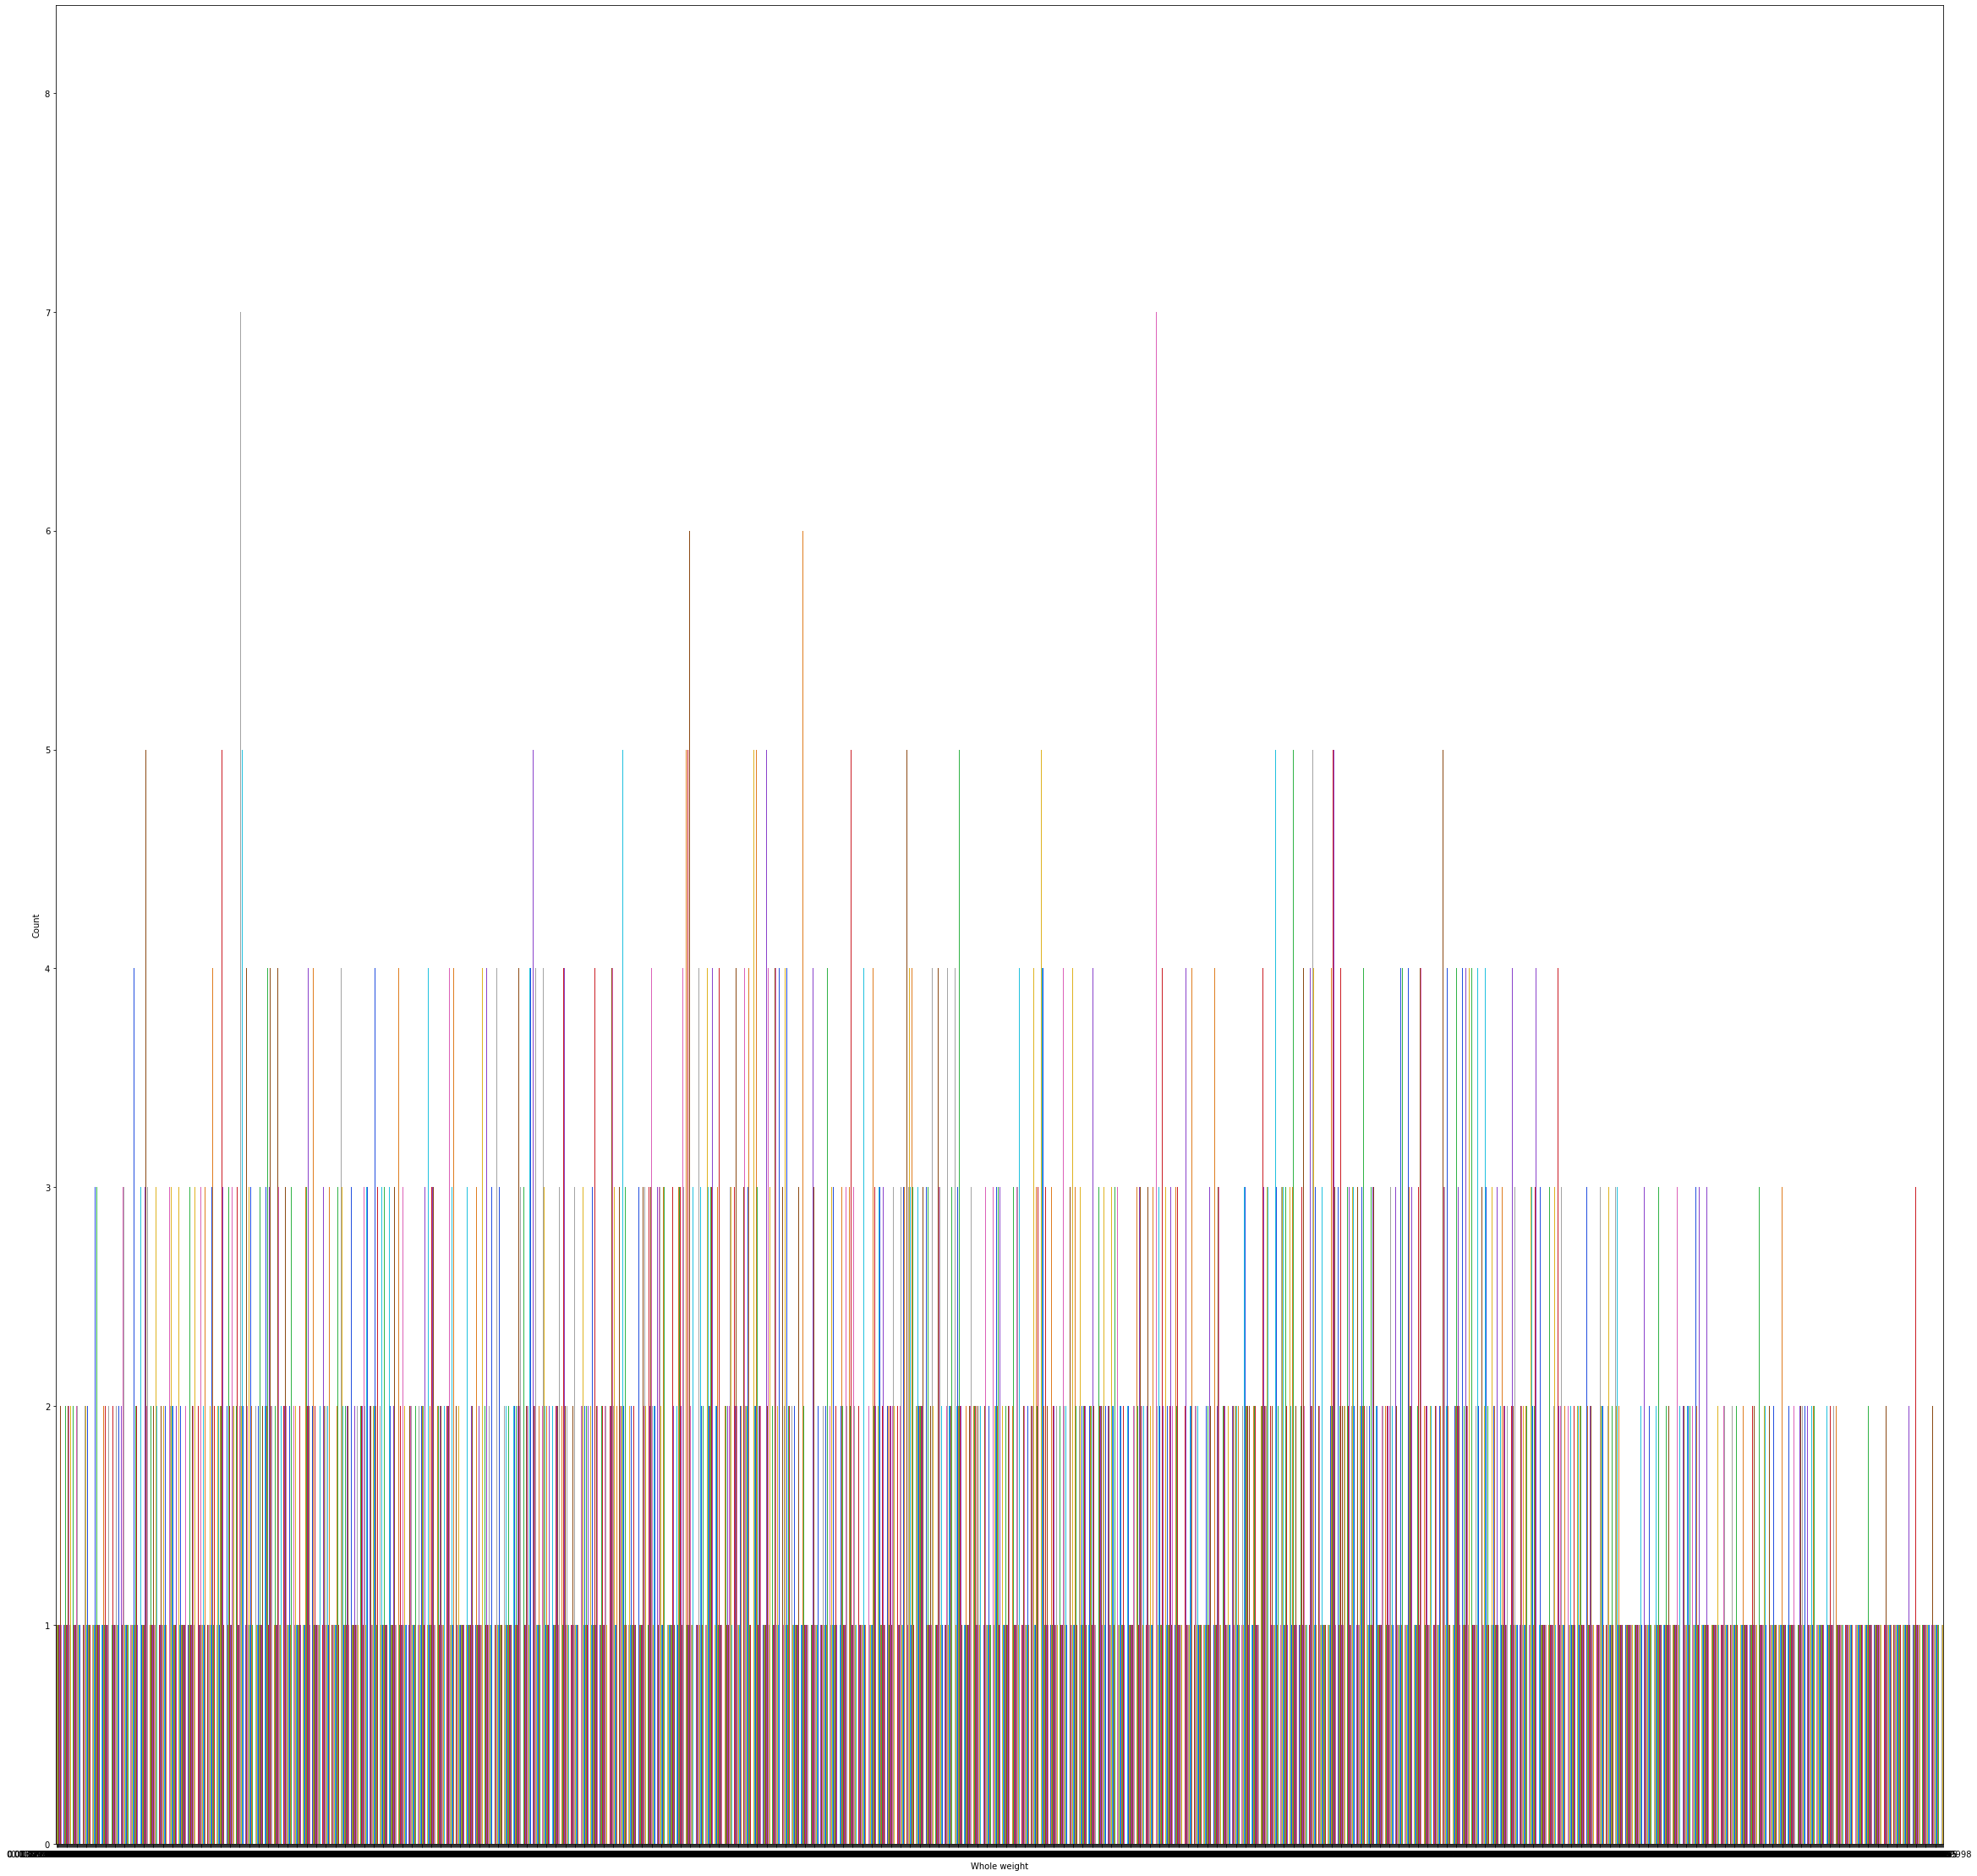

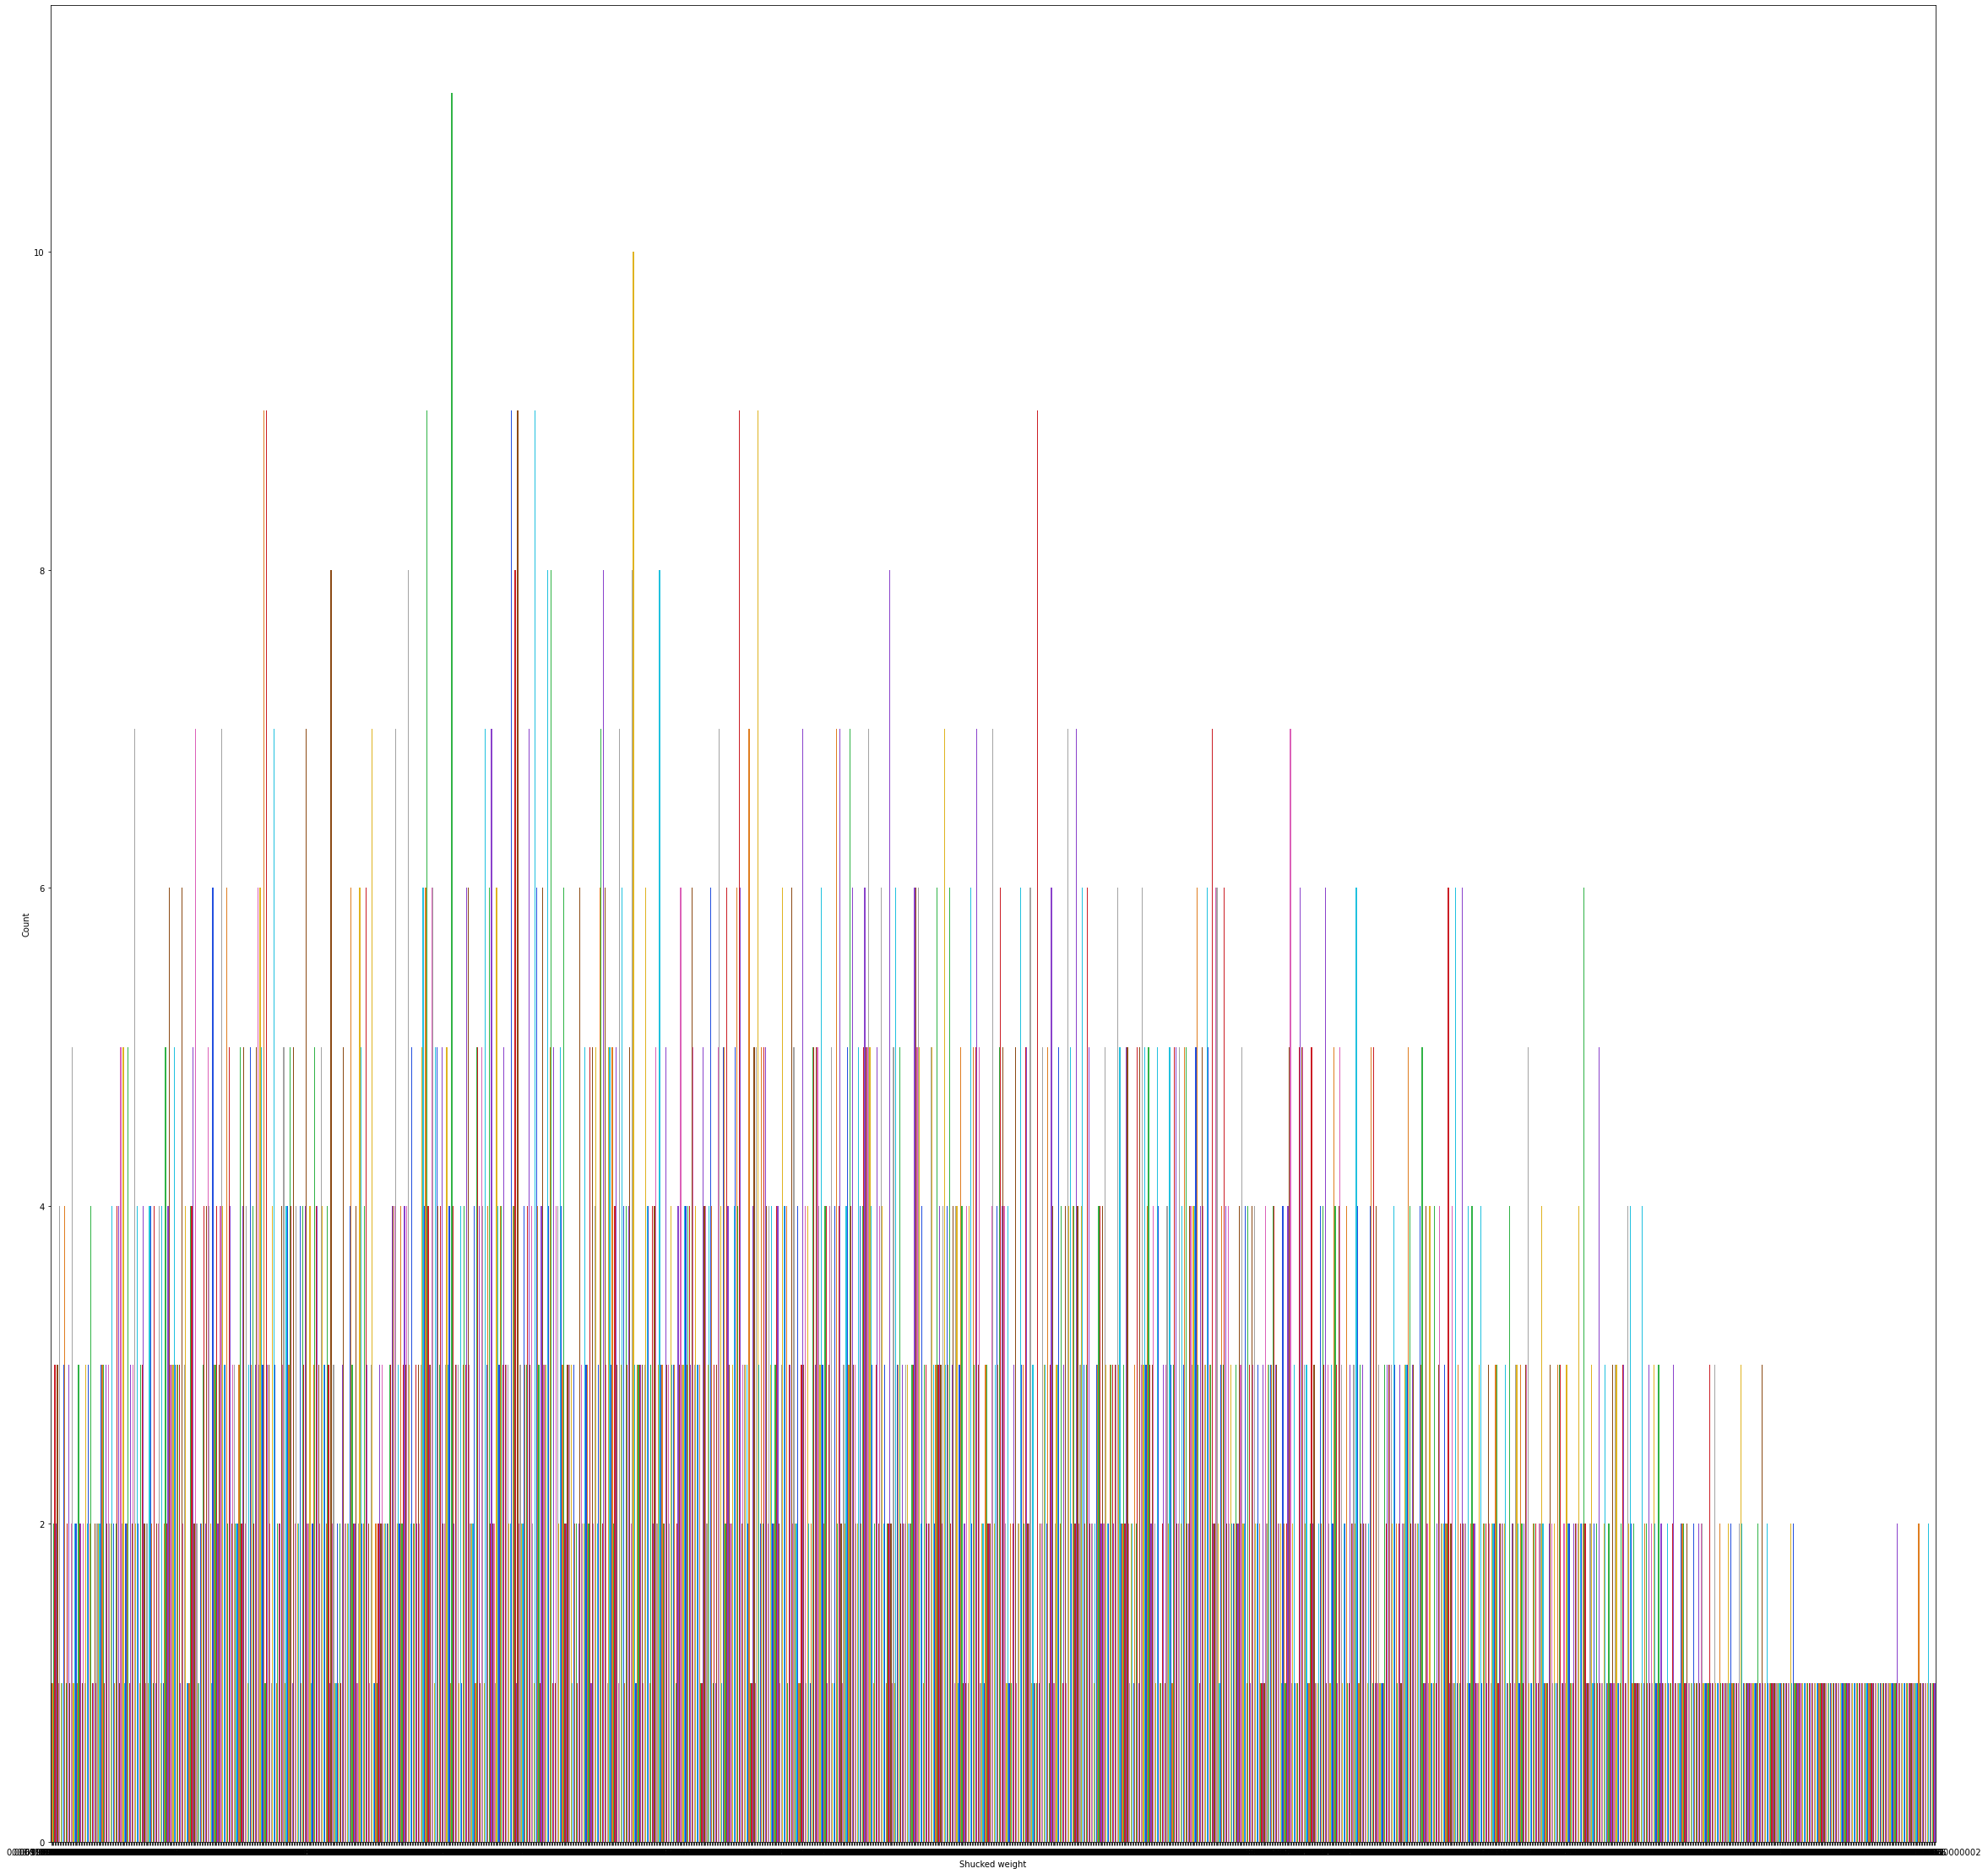

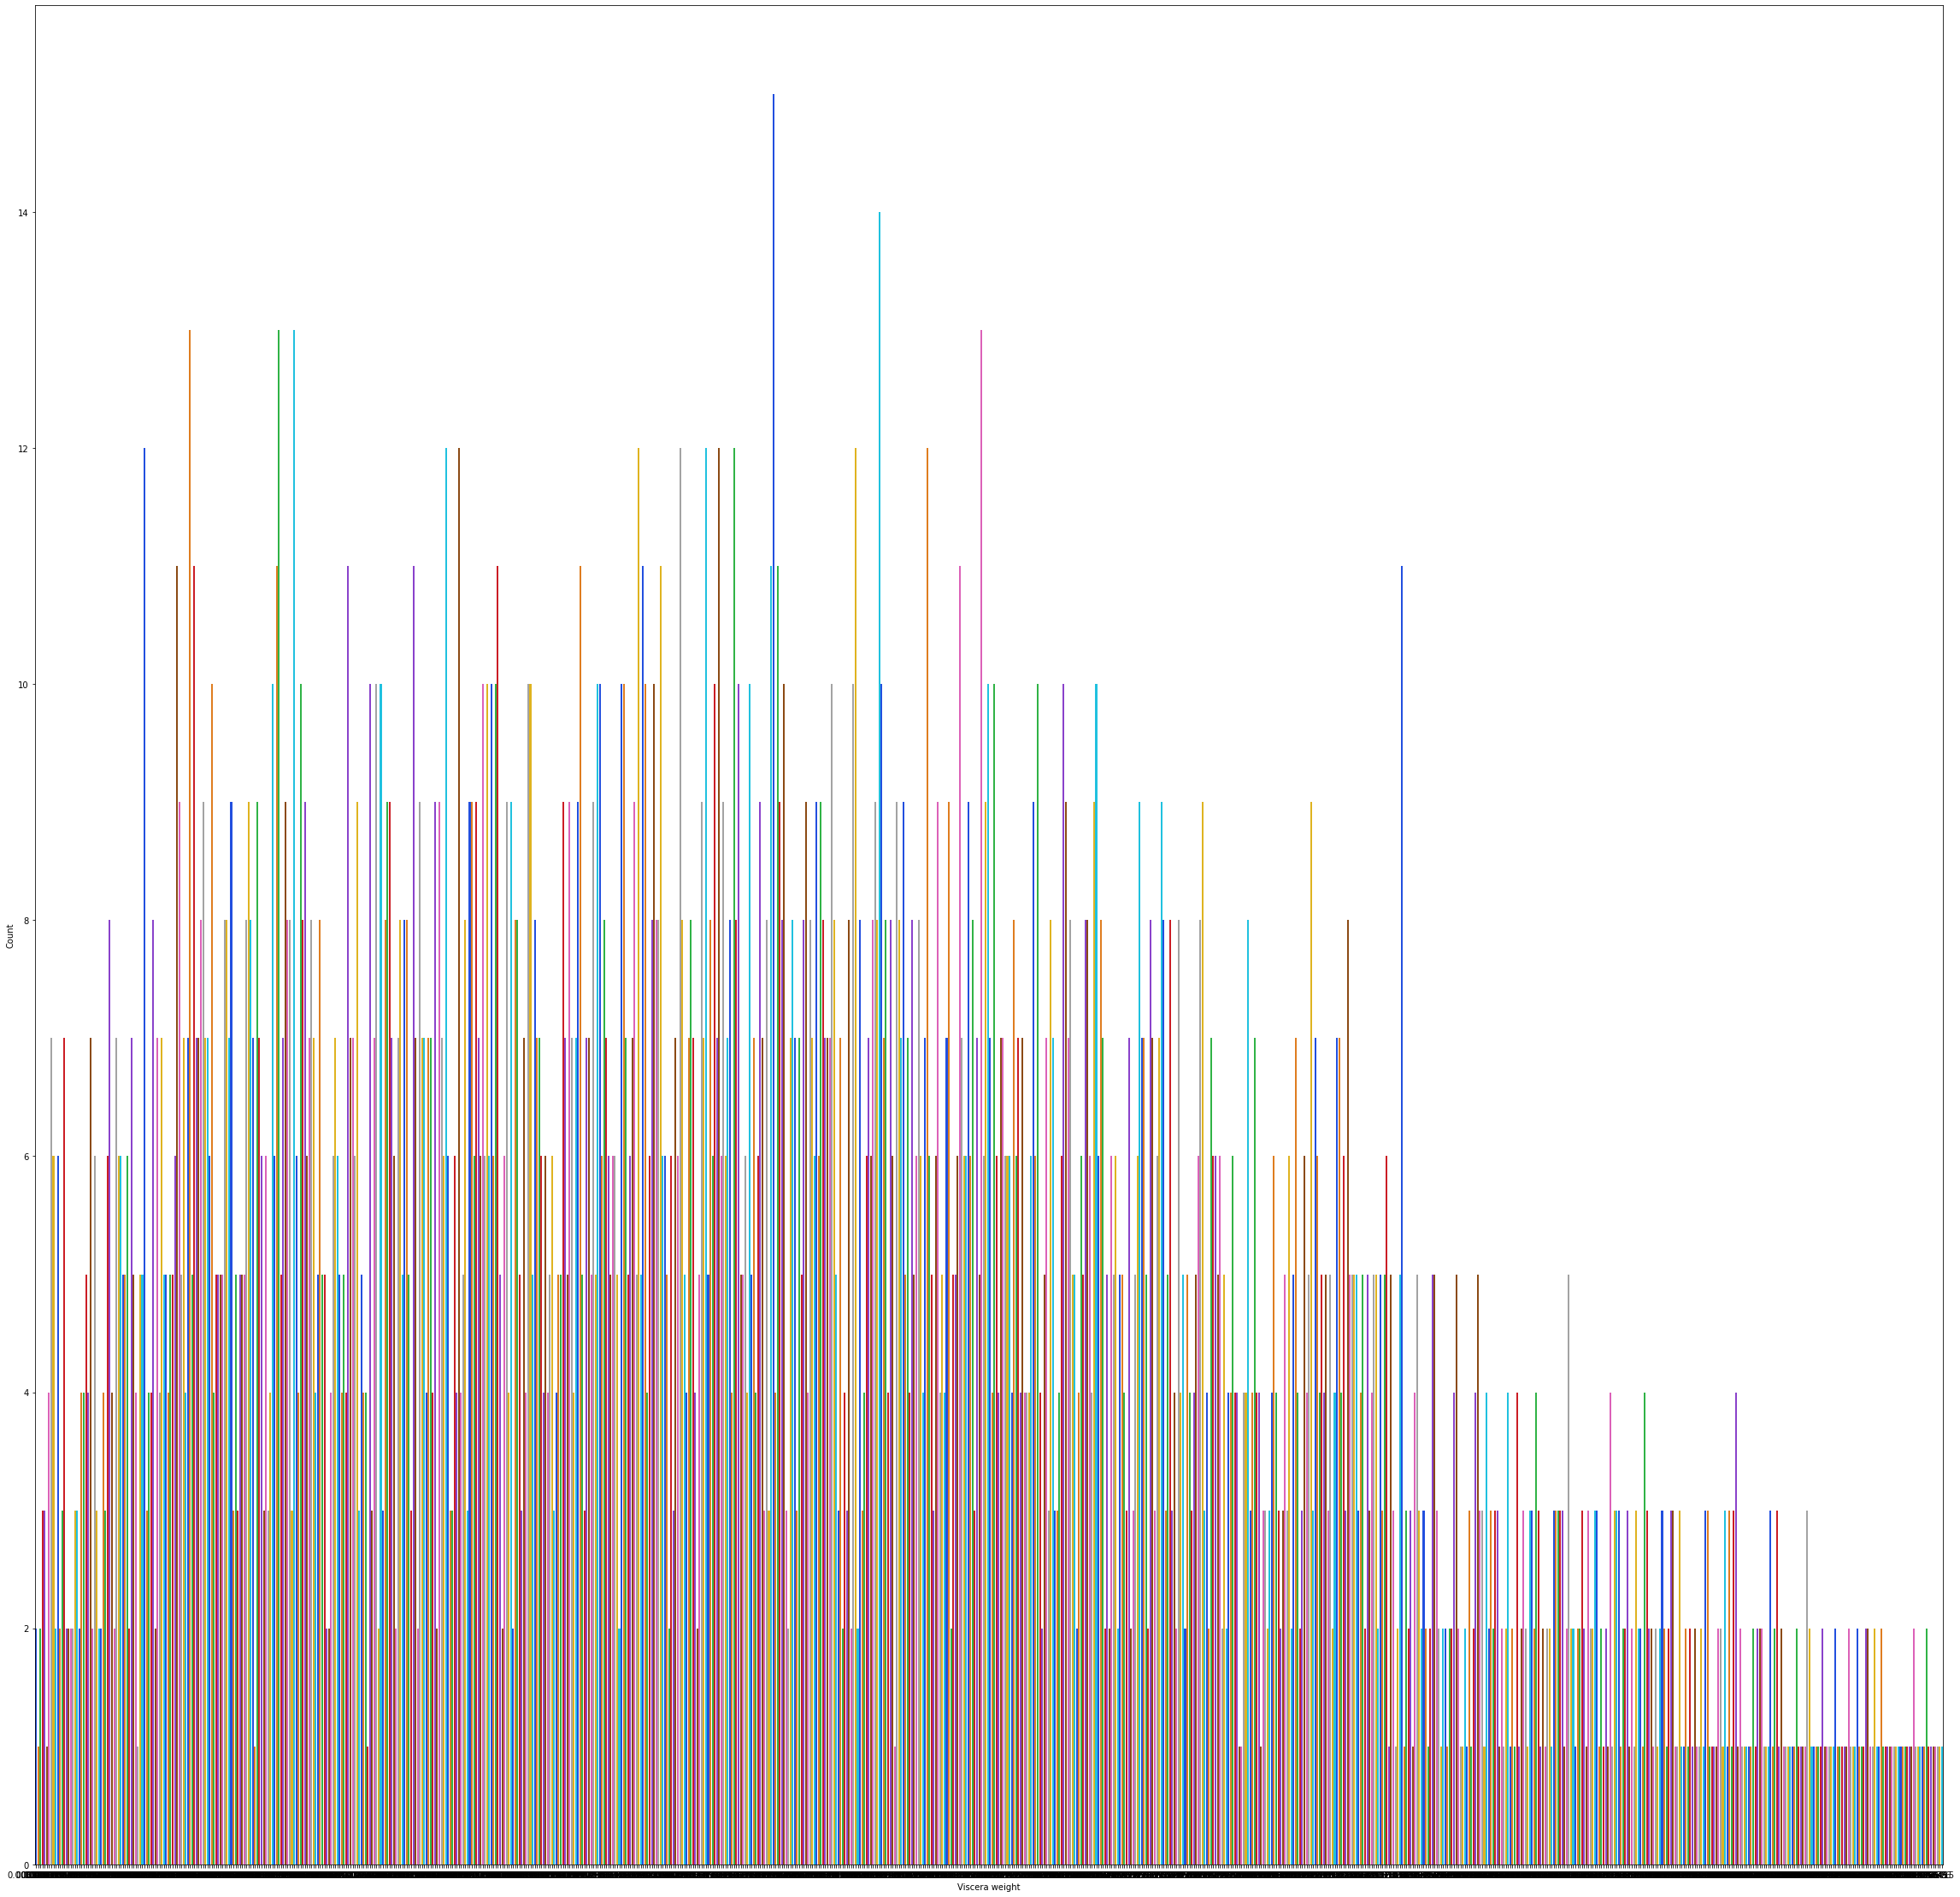

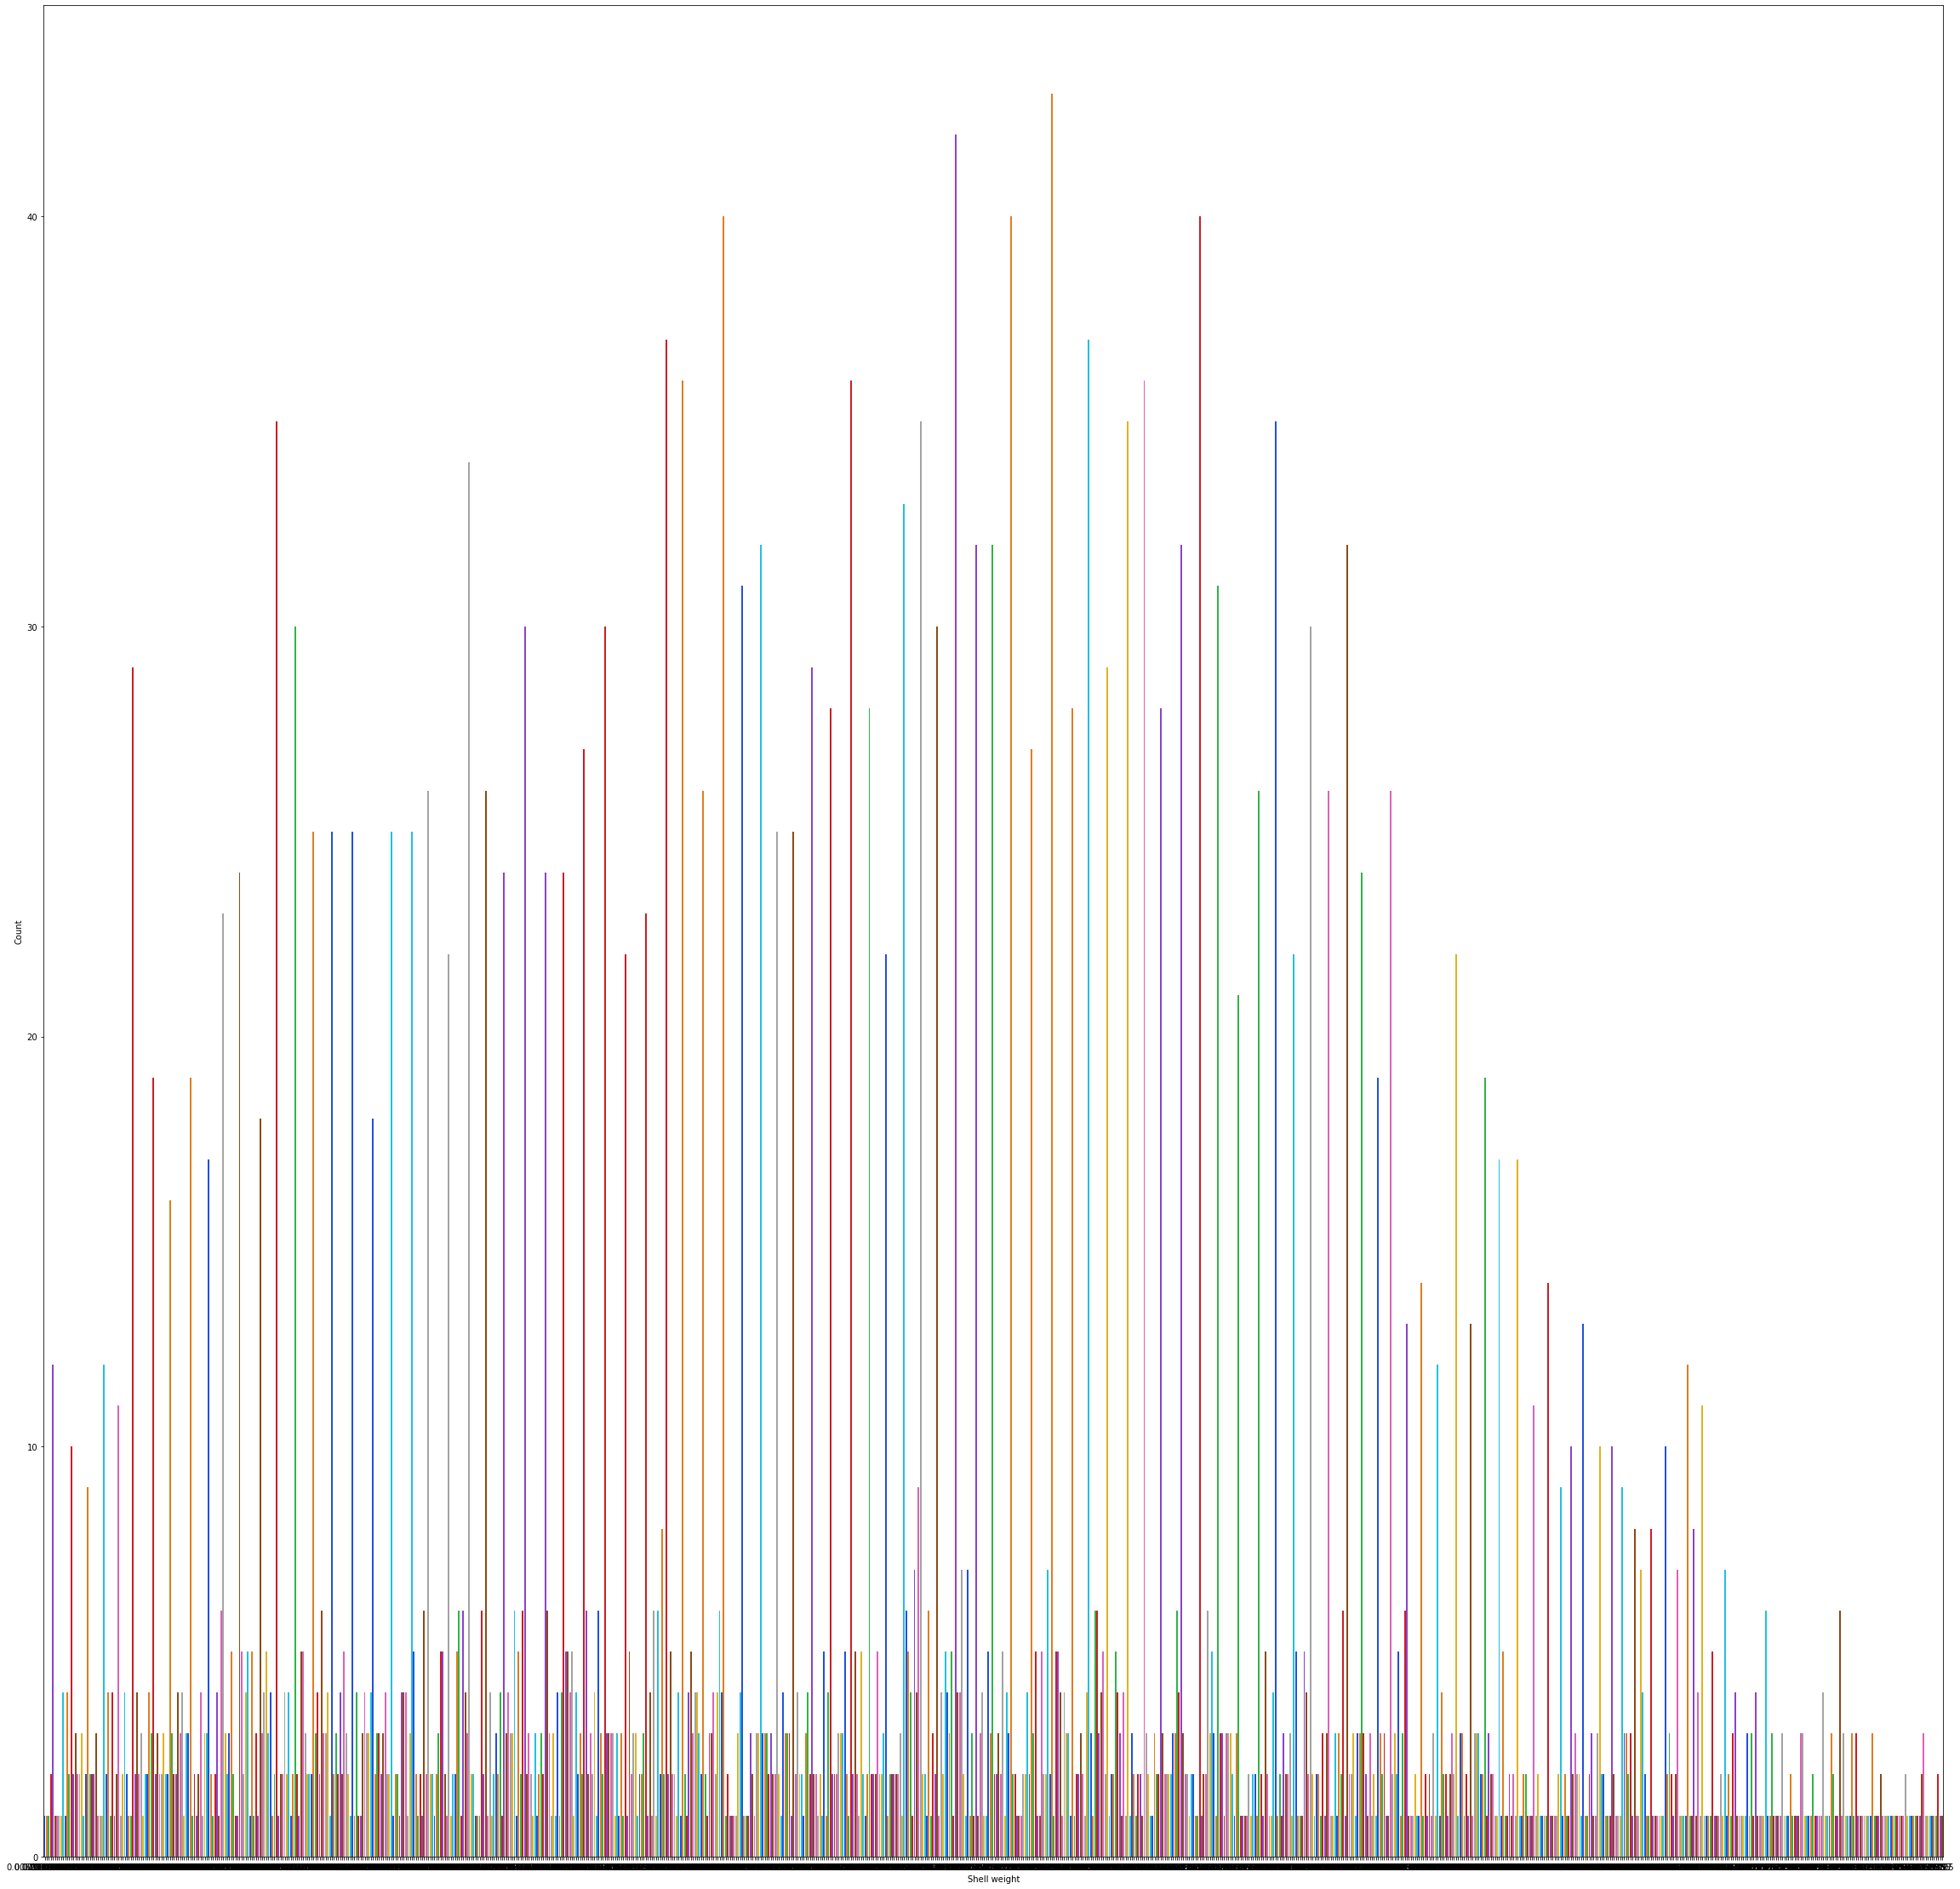

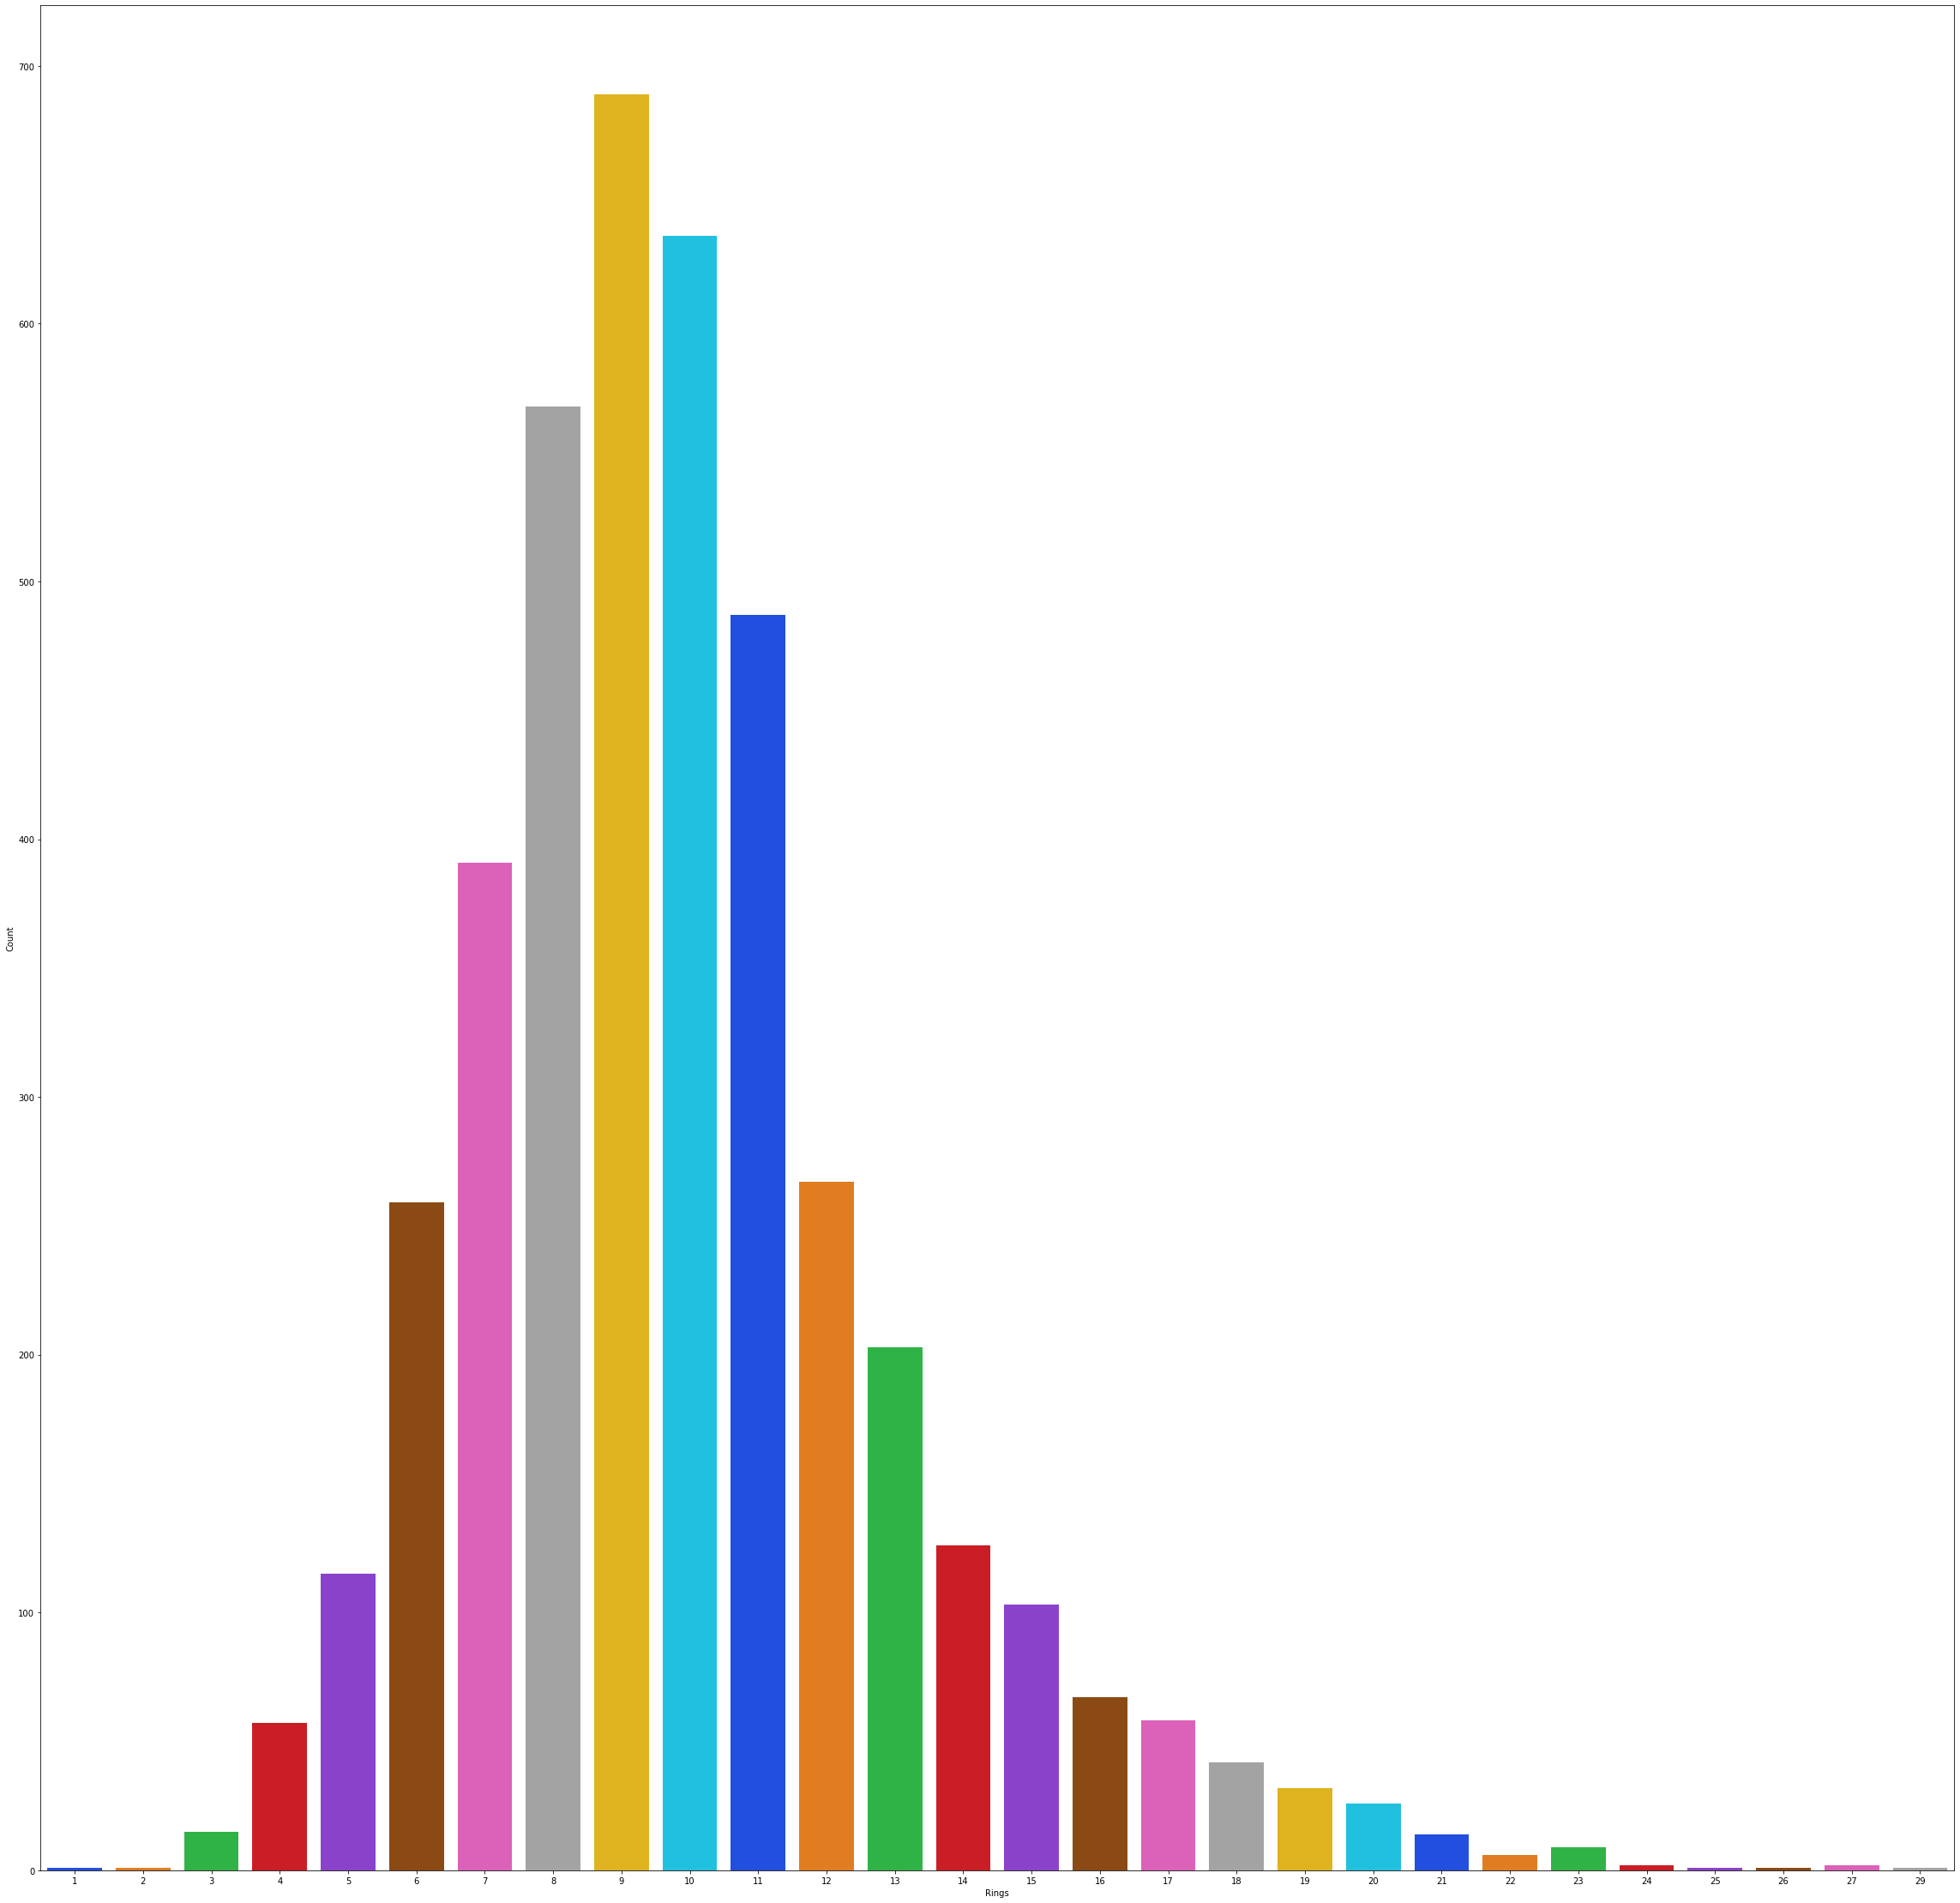

In [19]:
for col in df.columns:
    plt.figure(figsize=(40,40))
    sns.countplot(df[col],palette='bright')
    plt.ylabel('Count')
#    plt.title(col.title())
#    plt.xlabel(col.title())
plt.show()

In [21]:
collist=df.columns.values
collist

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'],
      dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Sex"]=LE.fit_transform(df["Sex"])
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


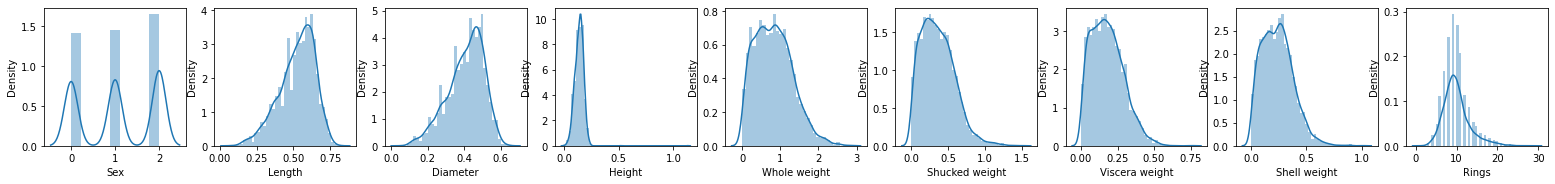

In [24]:
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

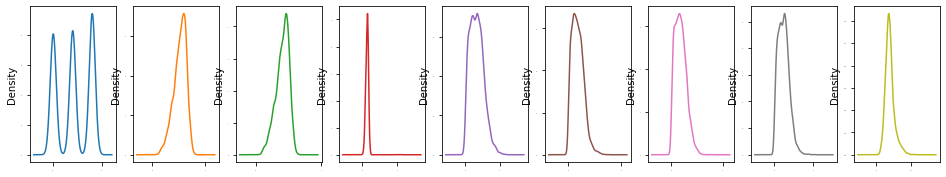

In [25]:
df.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False,fontsize=1,figsize=(20,20))
plt.show()

## Bivariate Analysis

<AxesSubplot:title={'center':'Comparision Height with length'}, xlabel='Height', ylabel='Length'>

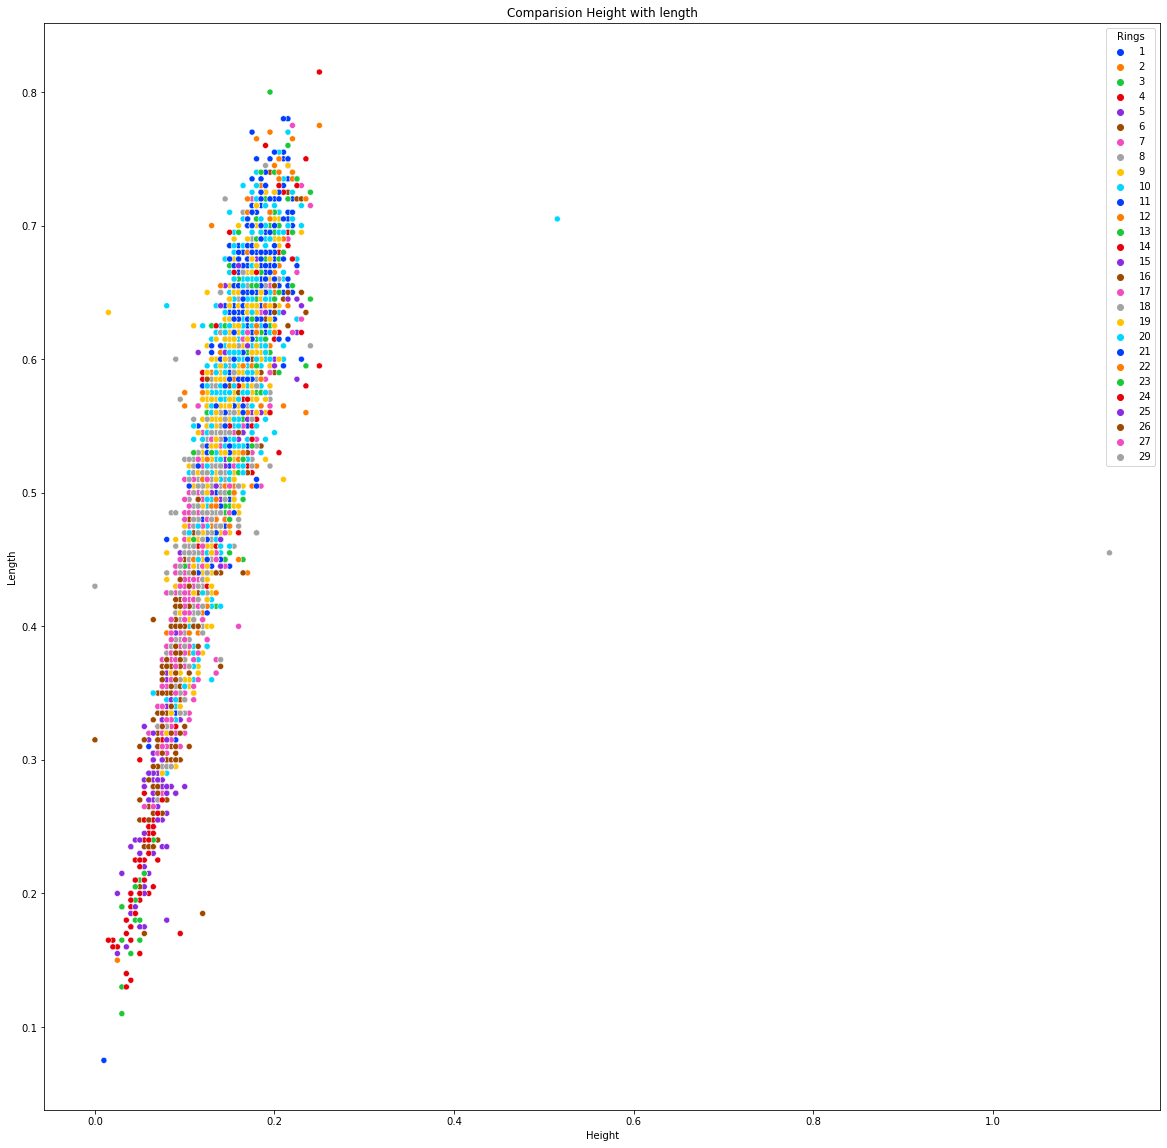

In [30]:
plt.figure(figsize=[20,20])
plt.title('Comparision Height with length')
sns.scatterplot(df['Height'],df['Length'],hue=df['Rings'],palette='bright')

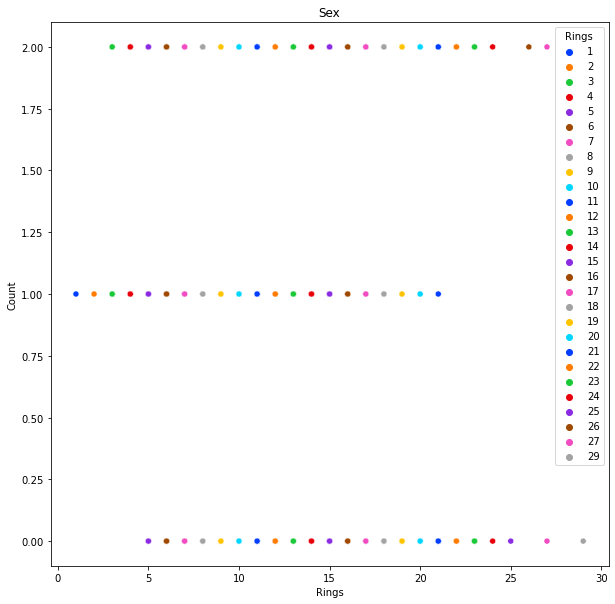

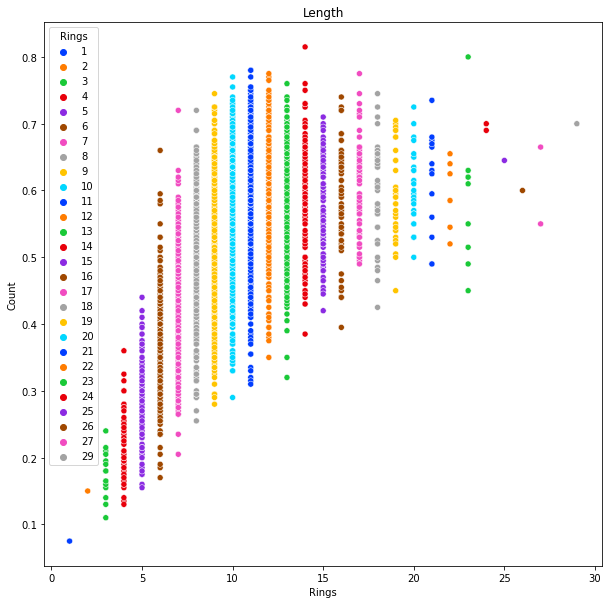

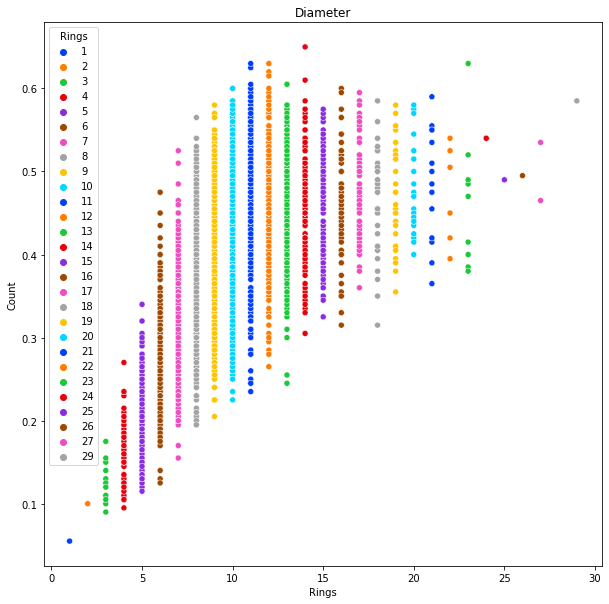

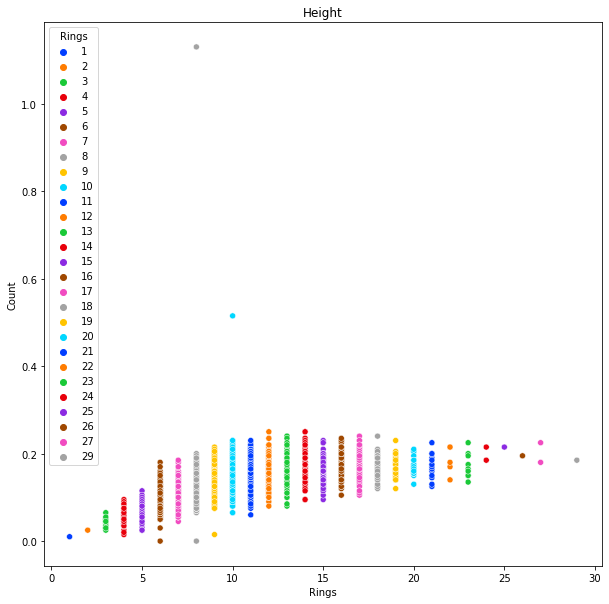

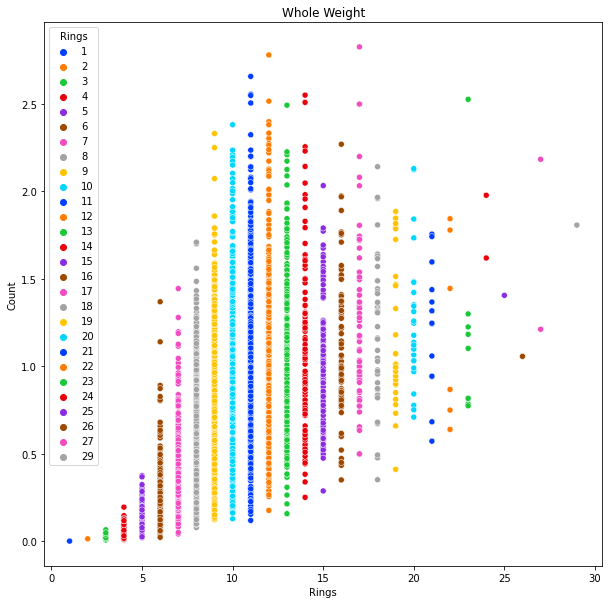

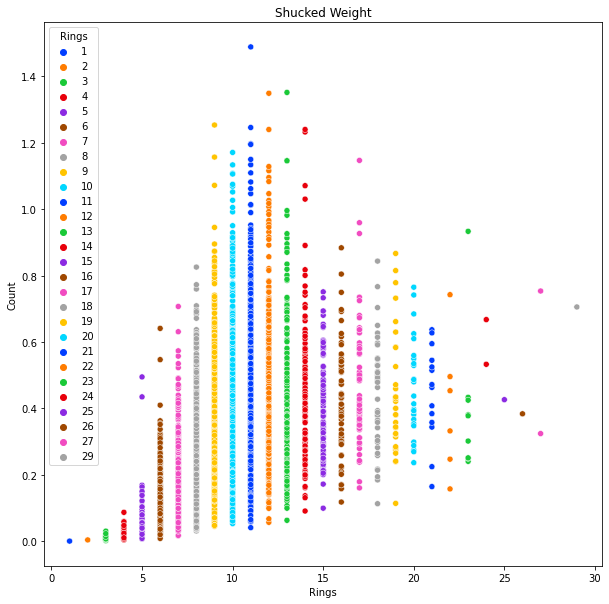

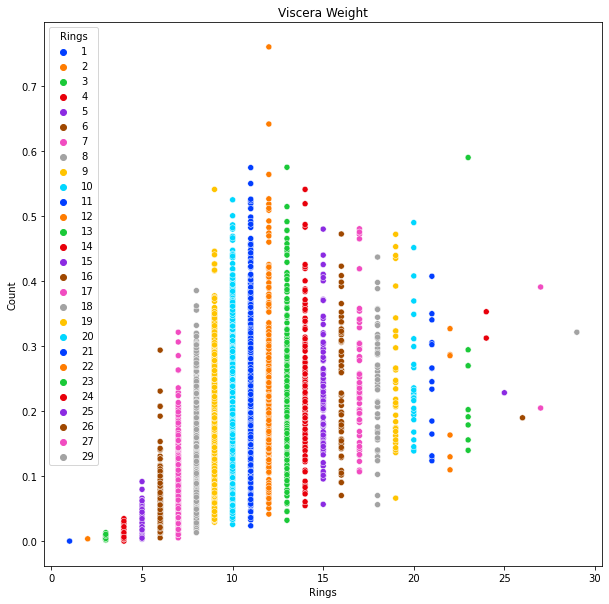

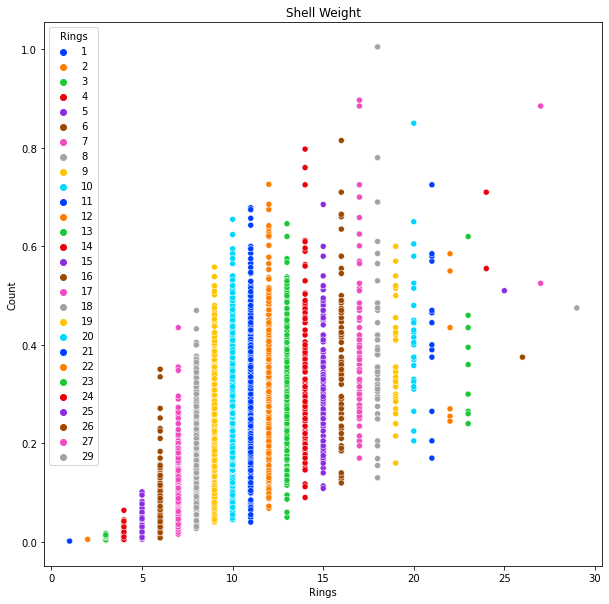

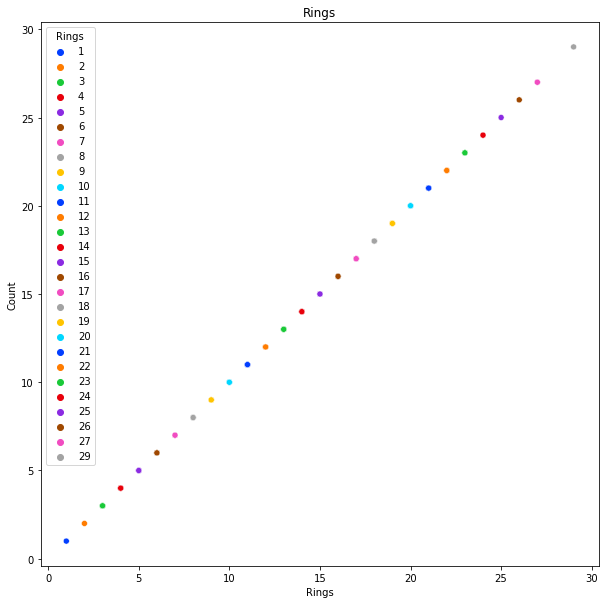

In [33]:
for col in df.columns:
    
    plt.figure(figsize=[10,10])
    sns.scatterplot(df['Rings'],df[col],hue=df['Rings'],palette='bright')
    plt.ylabel('Count')
    plt.title(col.title())
#   plt.xlabel(col.title())
plt.show()

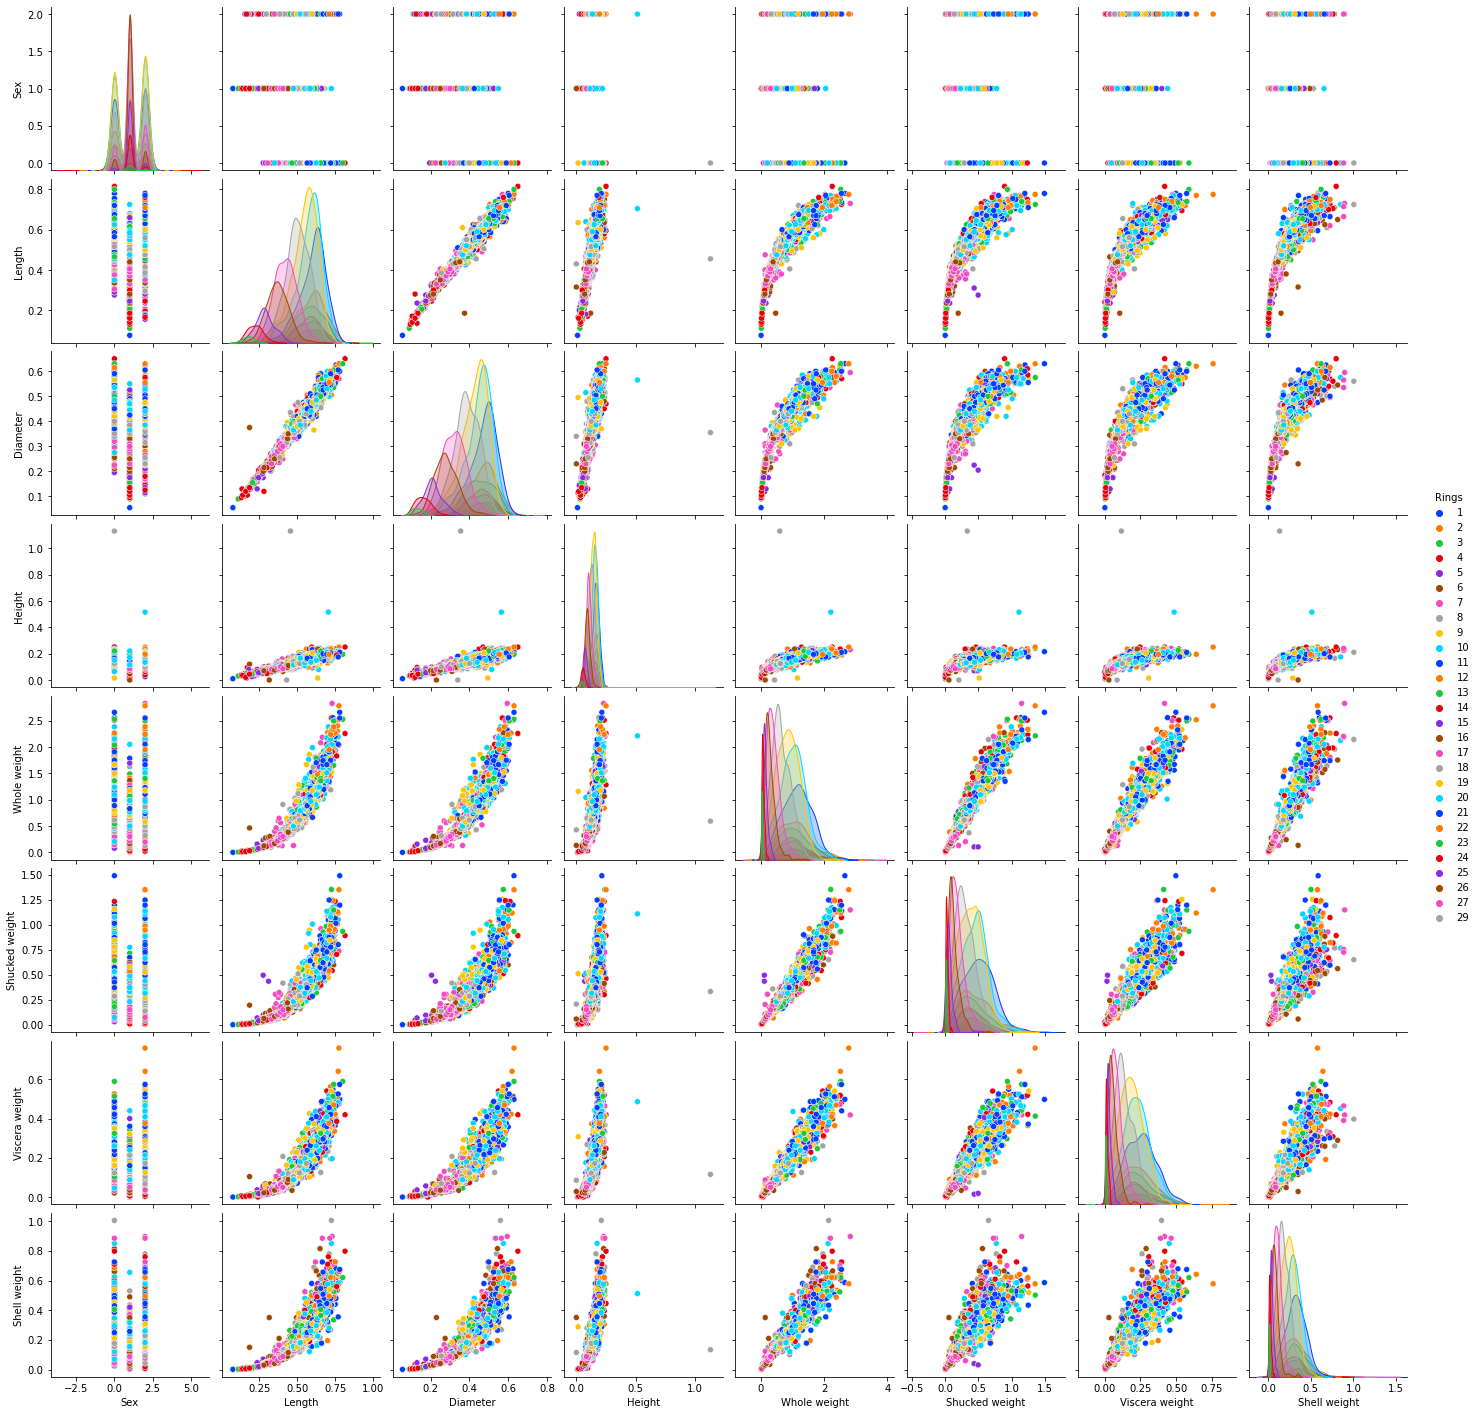

In [35]:
sns.pairplot(df,hue='Rings',palette='bright')

# Outliers & Skewness

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [37]:
new_df.shape

(4027, 9)

In [38]:
df.shape

(4177, 9)

In [39]:
((4177-4027)/4177)*100

3.5910940866650707

In [44]:
new_df.nunique()

Sex                  3
Length             120
Diameter            98
Height              46
Whole weight      2331
Shucked weight    1449
Viscera weight     831
Shell weight       863
Rings               17
dtype: int64

In [45]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [46]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [57]:
#Splitting the independent variables and the Target variables in x & y
x=new_df.drop("Rings",axis=1)
y=new_df["Rings"]

In [58]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [59]:
df_new.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03,4.027000e+03
mean,-3.248788e-16,-2.314734e-16,-3.167733e-16,4.240186e-17,2.357742e-16,1.542788e-16,2.888730e-16,4.299736e-16
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-1.313068e+00,-2.307737e+00,-2.298053e+00,-2.919373e+00,-2.018702e+00,-1.984972e+00,-1.996695e+00,-2.009986e+00
25%,-1.313068e+00,-7.232926e-01,-7.343454e-01,-6.568799e-01,-7.684168e-01,-7.887994e-01,-7.960780e-01,-7.852065e-01
50%,-8.745531e-03,4.713268e-02,3.716259e-02,8.087450e-03,5.412567e-02,1.891740e-02,2.184568e-02,3.994241e-02
75%,1.134329e+00,7.594042e-01,7.714106e-01,7.162502e-01,7.683180e-01,7.699306e-01,7.549839e-01,7.484580e-01
max,1.134329e+00,2.673552e+00,2.692562e+00,3.471453e+00,2.563556e+00,2.509041e+00,2.429440e+00,2.698707e+00


In [60]:
x.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
dtype: float64

In [61]:
df_new.skew()

Sex              -0.174523
Length           -0.082985
Diameter         -0.080956
Height           -0.015962
Whole weight     -0.016797
Shucked weight    0.021815
Viscera weight    0.035902
Shell weight      0.016660
dtype: float64

Skewness have been reduced.

In [62]:
x=df_new

# Finding best Random_state
Use any one model to find best random_state or else lot of computational time

In [64]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    lm=DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.3039879608728367   at random_state: 50


In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=50)

In [66]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)
x_t = scalar.transform(x)
print(x_t)
#print(x_test)

[[ 1.1182325  -0.68496522 -0.54652531 ... -0.54112239 -0.6884743
  -0.58406006]
 [ 1.1182325  -1.4059983  -1.40088345 ... -1.30589029 -1.329003
  -1.32590585]
 [-1.32531813 -0.05222307  0.03171954 ... -0.36427686 -0.24379574
  -0.08098384]
 ...
 [ 1.1182325   0.63912717  0.697832   ...  0.89099414  1.07737319
   0.65836   ]
 [-1.32531813  0.91169737  0.82910227 ...  0.91308594  0.86556989
   0.57276964]
 [ 1.1182325   1.94857771  1.84286672 ...  2.29314067  1.7155903
   1.84426222]]


# Applying the model

In [67]:
lm=LinearRegression()
lm

LinearRegression()

In [68]:
lm.fit(x_train,y_train)

LinearRegression()

In [69]:
lm.coef_

array([ 0.04229286, -0.69021623,  0.6771169 ,  0.73517593,  4.15915391,
       -4.08699779, -0.61862479,  1.457772  ])

In [70]:
lm.intercept_

9.735730170496664

In [71]:
df_new.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [72]:
lm.score(x_train,y_train)

0.5135119638141482

In [74]:
#Pridict the value
pred=lm.predict(x_test)
print("Predicted age : ", pred )
print("Actual age :", y_test)

Predicted age :  [ 7.46283693  8.95592759 10.48683779 ...  8.57694722  9.37649909
  9.23439074]
Actual age : 1464     9
2140    10
3175    11
1777     9
3736    10
        ..
1442     5
1342    10
472      9
2418    18
3809     8
Name: Rings, Length: 1329, dtype: int64


In [75]:
print("error")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 1.4735701371706682
Mean squared error: 3.969016864486392
Root mean squared error: 1.9922391584562311


In [76]:
#r2 score ------> coefficient of determination
#i.e. change coming in y whenever x is being changed.
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.5101630132964655


In [77]:
from sklearn.linear_model import Lasso,Ridge


In [78]:
ls=Lasso(alpha=0.0001) 
ls.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [79]:
ls.score(x_train,y_train)

0.5135114905722207

In [80]:
ls.coef_

array([ 0.0421671 , -0.6846685 ,  0.67194224,  0.73520909,  4.13964566,
       -4.07849165, -0.61313178,  1.46328225])

In [81]:
ls.intercept_

9.735730170496664

In [82]:
# to minimize the coefficient varience
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.5135119638133667

In [83]:
rd.coef_

array([ 0.04229281, -0.69021477,  0.67711575,  0.73517631,  4.1591241 ,
       -4.08698362, -0.61861835,  1.45778115])

In [84]:
rd.intercept_

9.735730170496664

## Cross Validation with all the above models

In [85]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("Cross Validation Score of LinearRegression Model is : ", scr.mean())

Cross Validation Score of KNeighborsClassifier Model is :  0.4231197734786424


In [86]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ls,x,y,cv=5)
print("Cross Validation Score of Lasso Model is : ", scr.mean())

Cross Validation Score of Lasso Model is :  0.42313274419347097


In [87]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rd,x,y,cv=5)
print("Cross Validation Score of RidgeRegression Model is : ", scr.mean())

Cross Validation Score of RidgeRegression Model is :  0.423119811103107


# Parameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV
#Creating Parameter list  to pass in GridSearchCV
parameters={'max_depth': np.arange(2,10),
             'criterion': ['gini','entropy']}
from sklearn.ensemble import RandomForestClassifier

In [98]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [99]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [100]:
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [111]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=50)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

24.90594431903687


After tuning accuracy is reduced

# Saving the model

In [116]:
import joblib
joblib.dump(mod,"Abalone.pkl")

['Abalone.pkl']

# Loading the saved model

In [118]:
model=joblib.load("Abalone.pkl")

In [119]:
prediction=model.predict(x_test)

In [120]:
print(accuracy_score(y_test,prediction)*100)

24.90594431903687


In [121]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [122]:
prediction.to_csv('Results.csv') #Saving the predictions

In [123]:
prediction

,0
0,8
1,8
2,14
3,18
4,11
...,...
1324,6
1325,12
1326,7
1327,9
